**Name:** Tal Levin

**ID:** 314920505

**Kaggle User:** https://www.kaggle.com/tallevin12/account


This will be my model for the "House Prices - Advanced Regression Techniques" Kaggle competition.

The goal is to predict in the most accurate way houses prices in Ames, Iowa.

My plan for this challenge:
- Look at the data and draw as many conclusions from it as possible

- Encode and normlize the data to make it ready for testing

- test the data with different techniques of regularization, feature selction while finding the best set of hyper parameters. 

- All the testing will be made on a cross validation. i'll some graphs to visulize the differnces between models better

- Choose the best model based on score/loss on val/train.

#Some photos of Ames, Iowa to know the city better and to get into the atmosphere of the city :) 

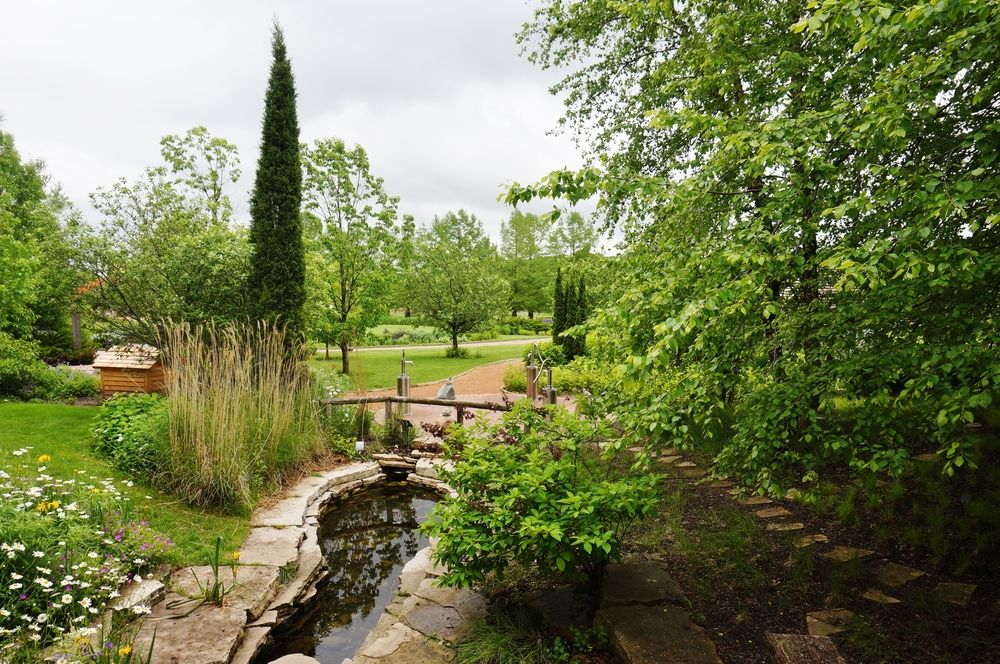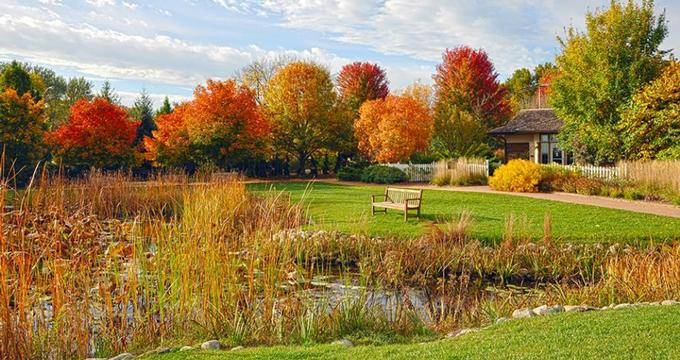

# Because if Iowa popped up in Brooklyn 99 on the day of submission you must add it

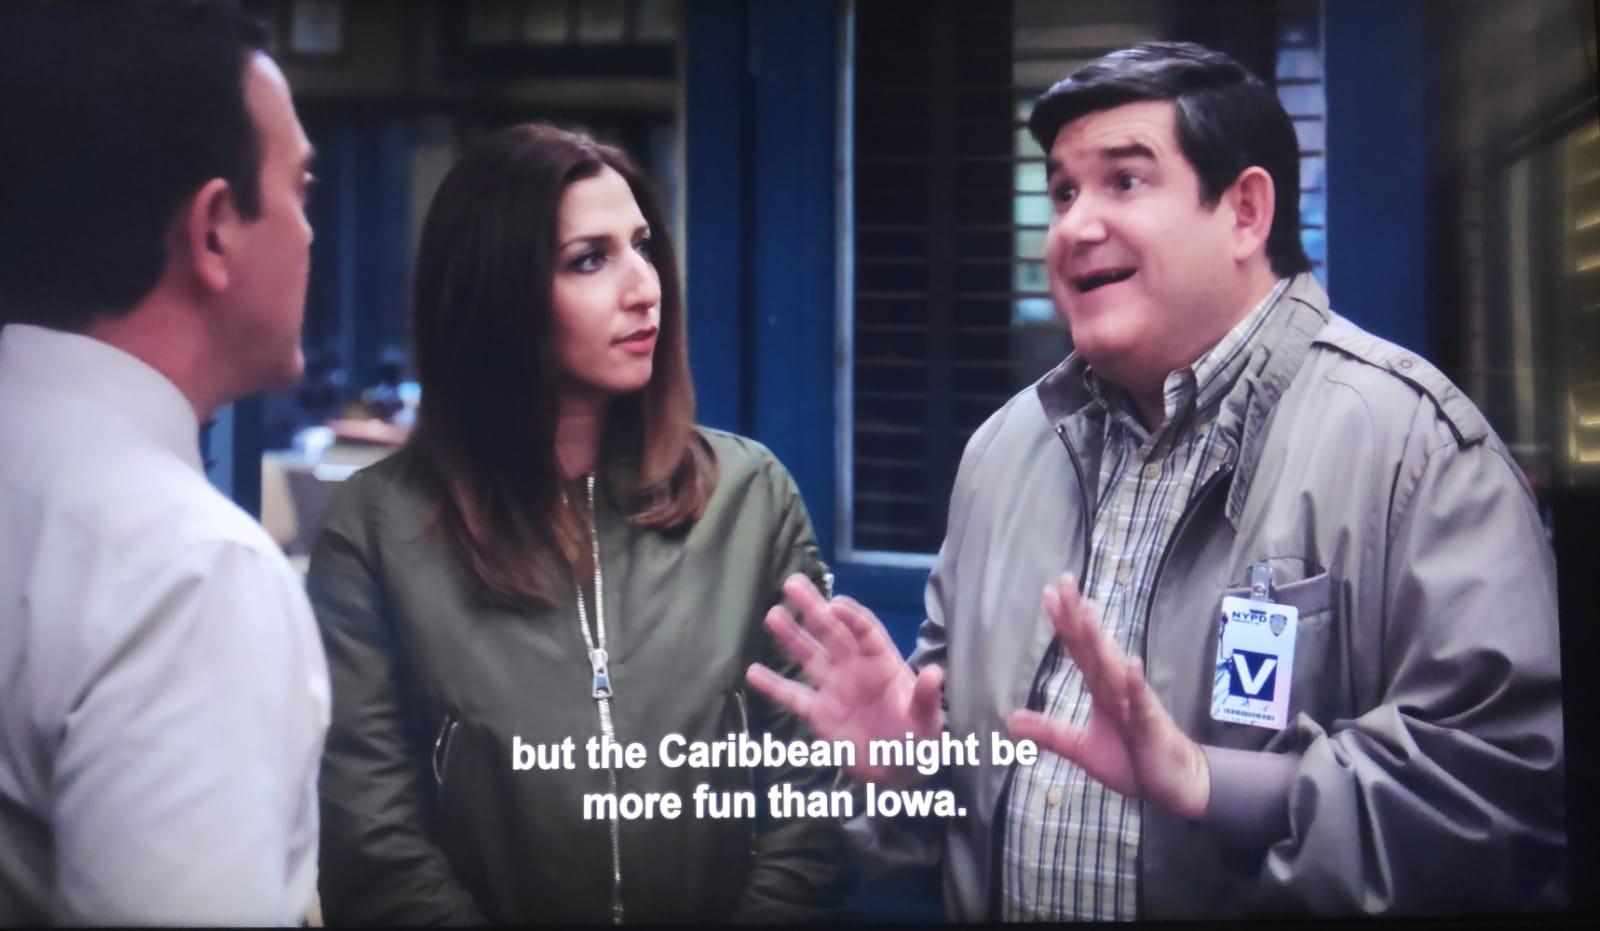

# I doubt it cousin Boyle :)

In [ ]:
!pip install --upgrade plotly
!pip install sweetviz

     |████████████████████████████████| 25.3 MB 55.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 15.1 MB 5.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn import pipeline
import plotly.express as px
import sweetviz as sw
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

In [ ]:
train = pd.read_csv("/content/train.csv")
test  = pd.read_csv("/content/test.csv")

target = train.SalePrice

# Correlation with target value

In [ ]:
target_corr_list = train[train.columns[1:]].corr()['SalePrice'].abs()[:]
target_corr_list.sort_values(ascending=False, inplace=True)
target_corr_list

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

**OverallQual and GrLivArea has a very high correlation with the target value**

GarageCars,
GarageArea,
TotalBsmtSF,
1stFlrSF,
FullBath,
TotRmsAbvGrd,
YearBuilt
and YearRemodAdd Has high correlation with the taget value

# Combining test and target

In [ ]:
train.drop('SalePrice', axis=1, inplace=True)

train["isTrain"] = True #To seperate them later
test["isTrain"] = False

all_data = pd.concat([train, test])
all_data.reset_index(inplace=True, drop=True)

In [ ]:
all_data

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition isTrain
0        1          60       RL  ...        WD         Normal    True
1        2          20       RL  ...        WD         Normal    True
2        3          60       RL  ...        WD         Normal    True
3        4          70       RL  ...        WD        Abnorml    True
4        5          60       RL  ...        WD         Normal    True
...    ...         ...      ...  ...       ...            ...     ...
2914  2915         160       RM  ...        WD         Normal   False
2915  2916         160       RM  ...        WD        Abnorml   False
2916  2917          20       RL  ...        WD        Abnorml   False
2917  2918          85       RL  ...        WD         Normal   False
2918  2919          60       RL  ...        WD         Normal   False

[2919 rows x 81 columns]

                                             |          | [  0%]   00:00 -> (? left)


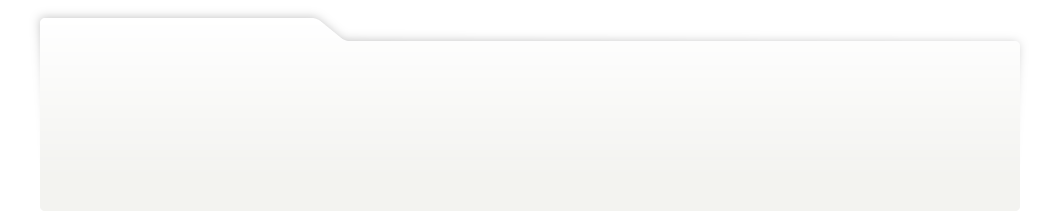
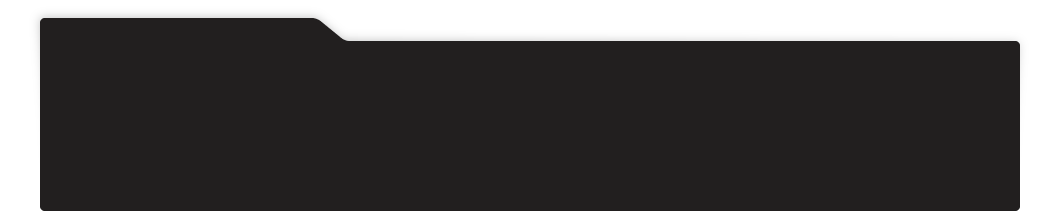
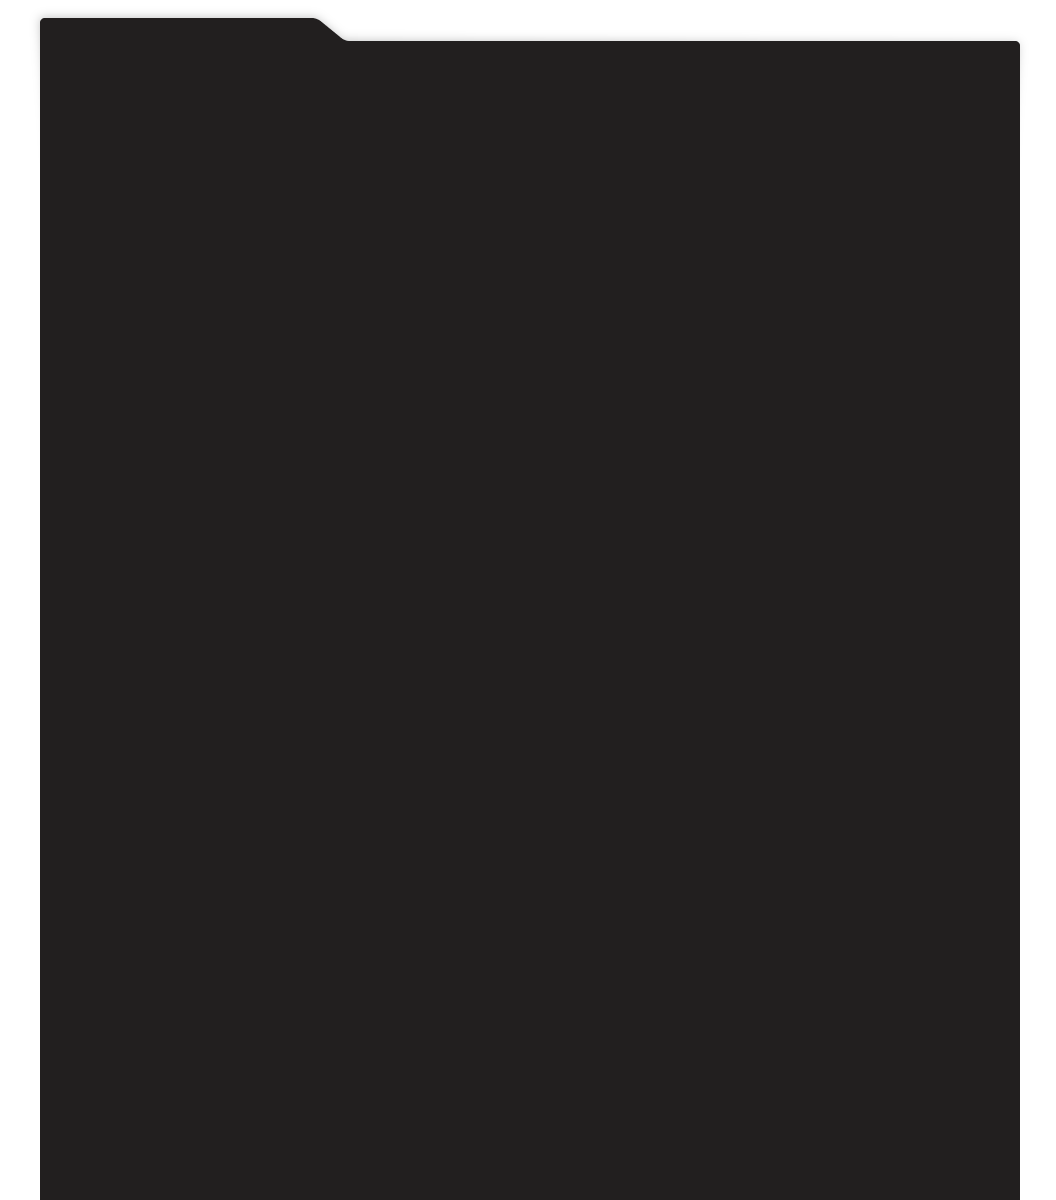
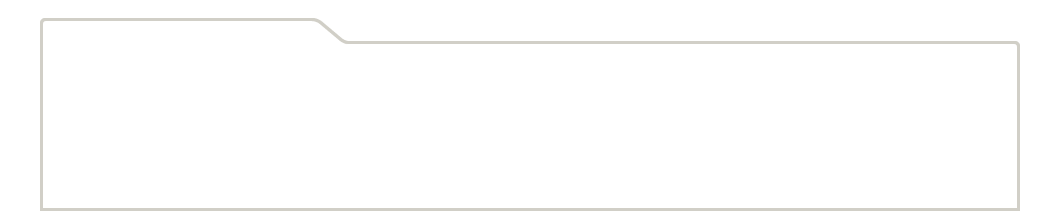
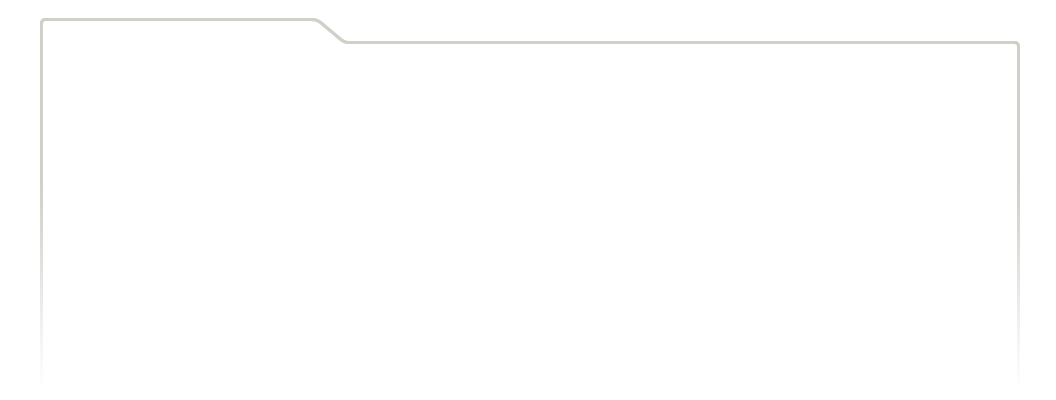
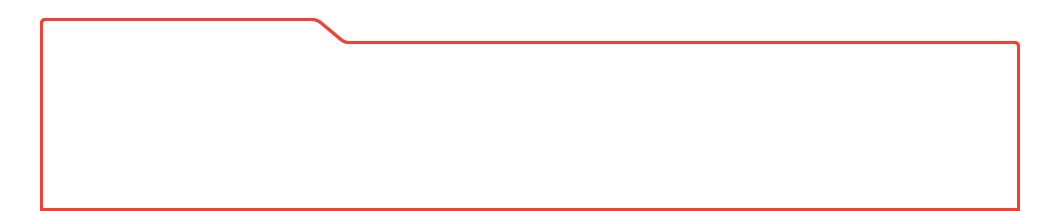
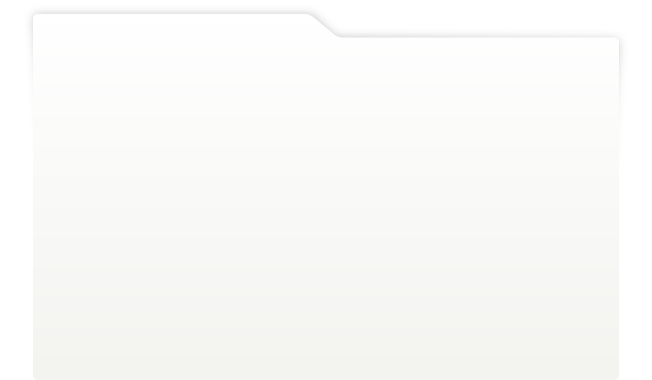
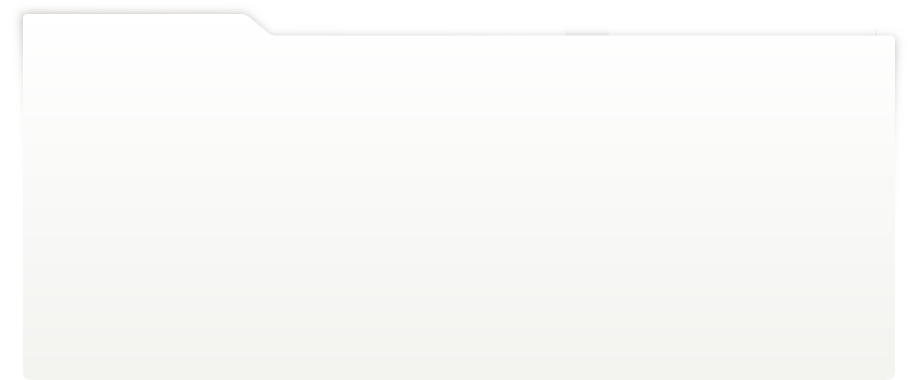
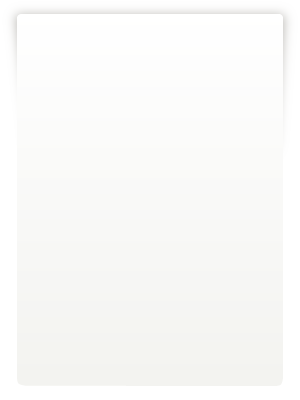
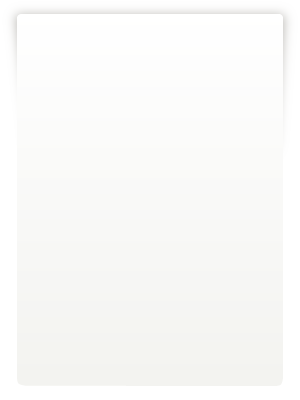
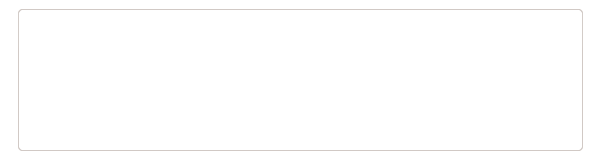
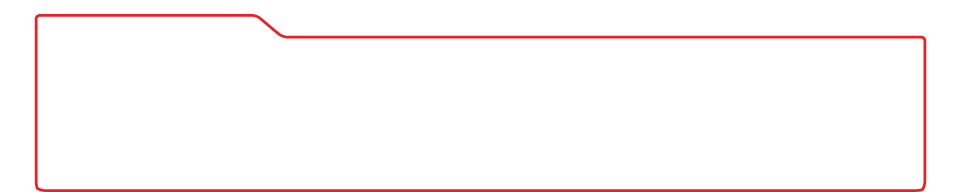
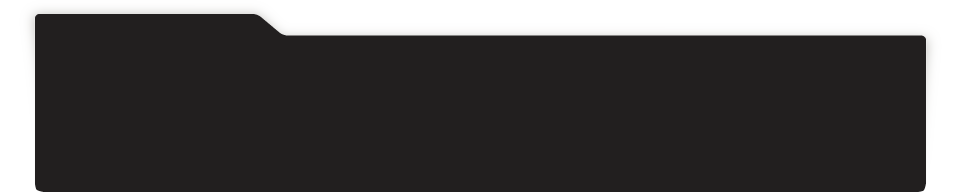
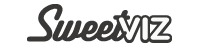
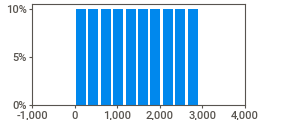
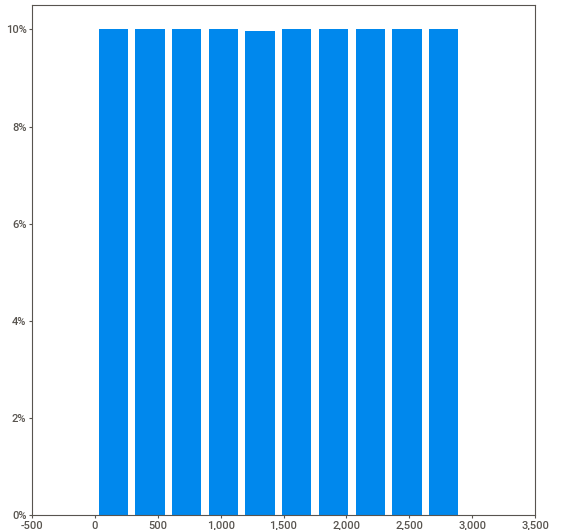
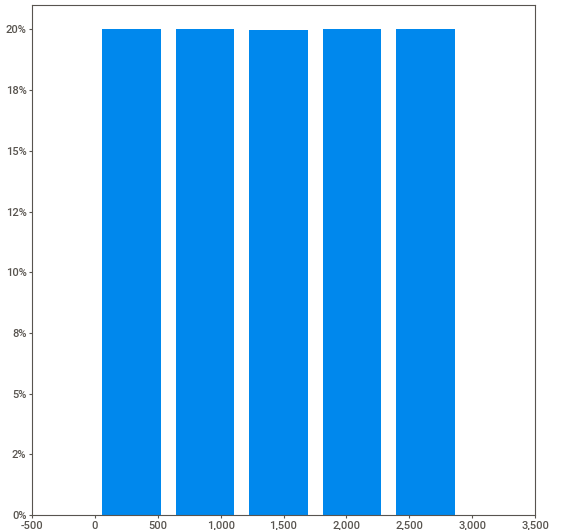
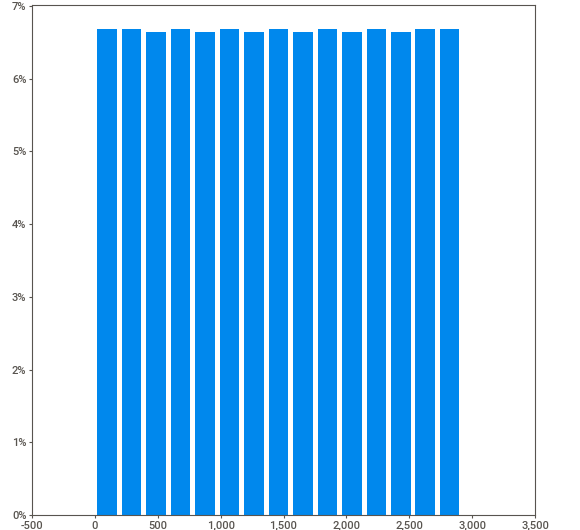
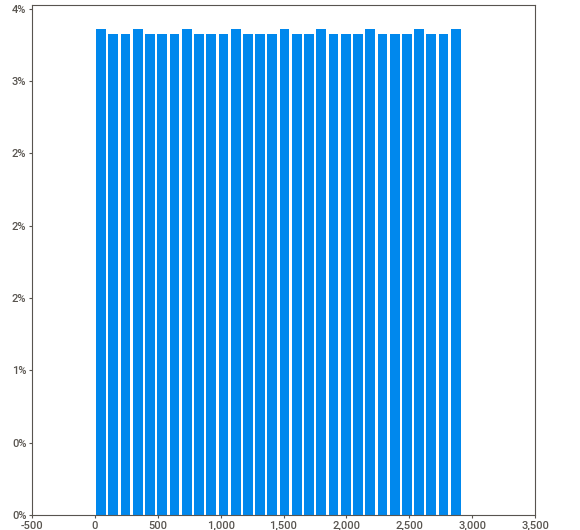
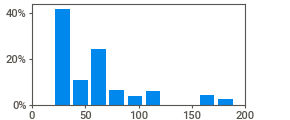
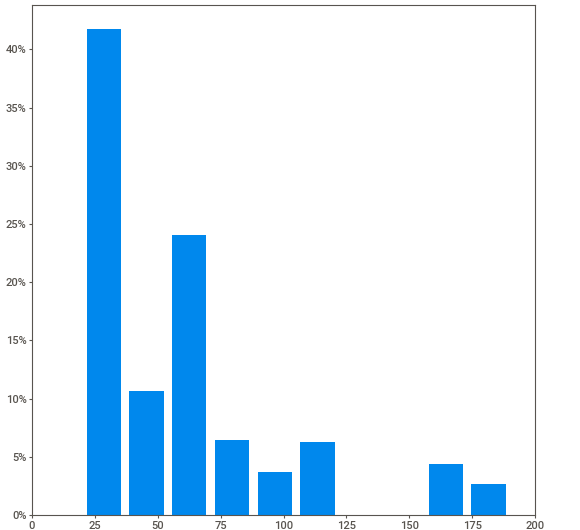
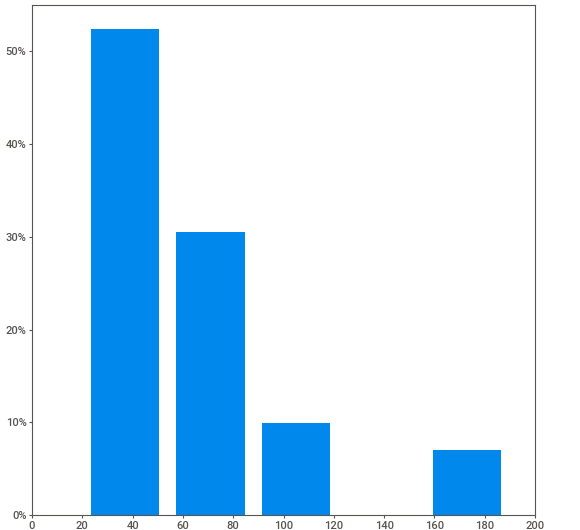
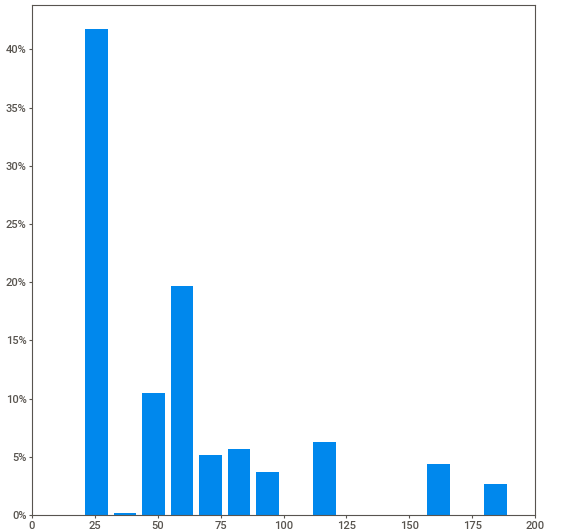
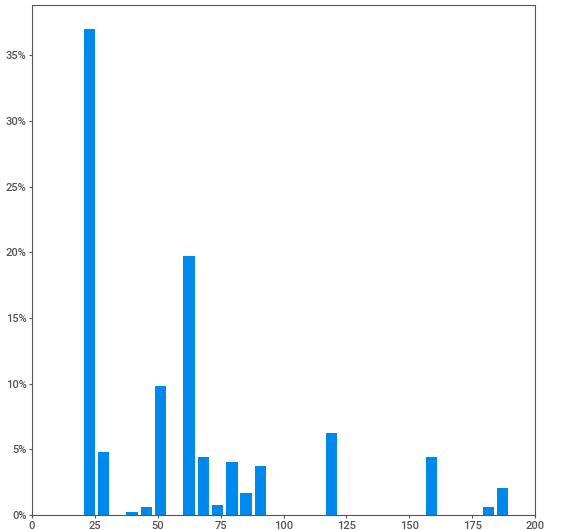
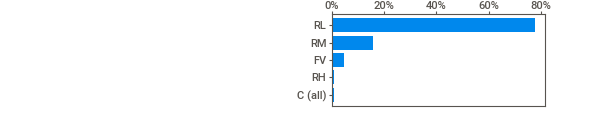
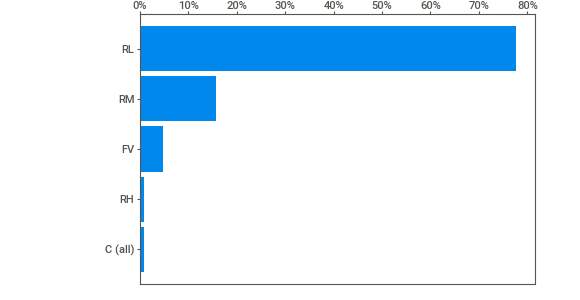
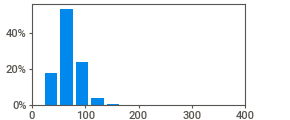
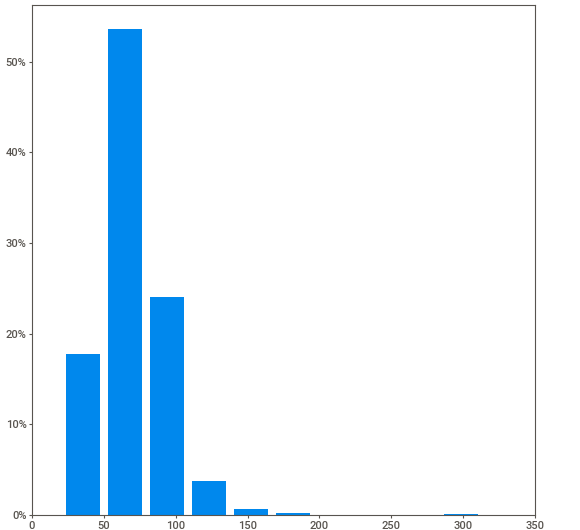
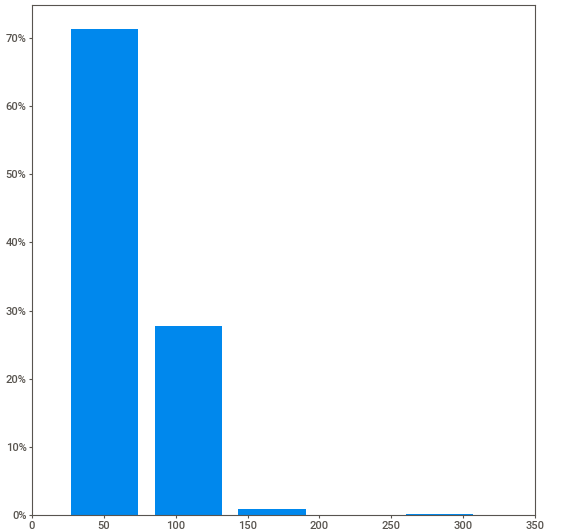
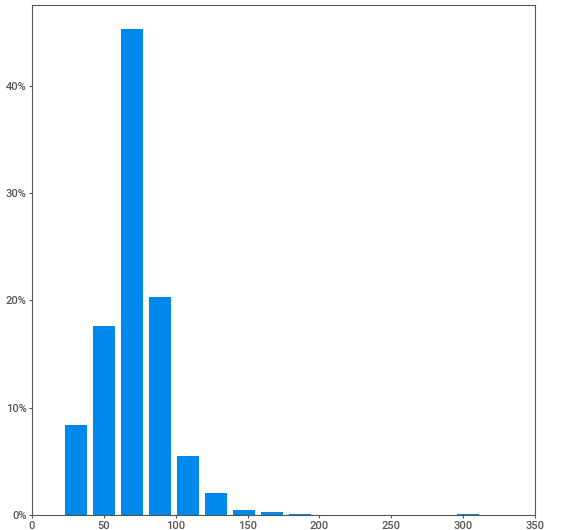
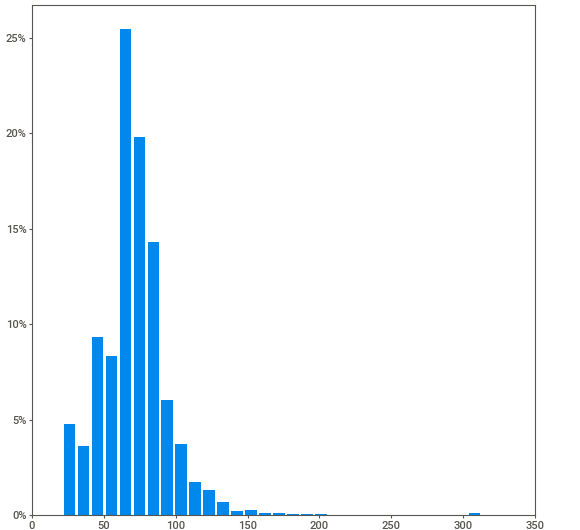
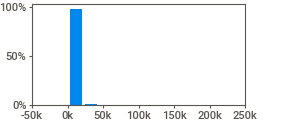
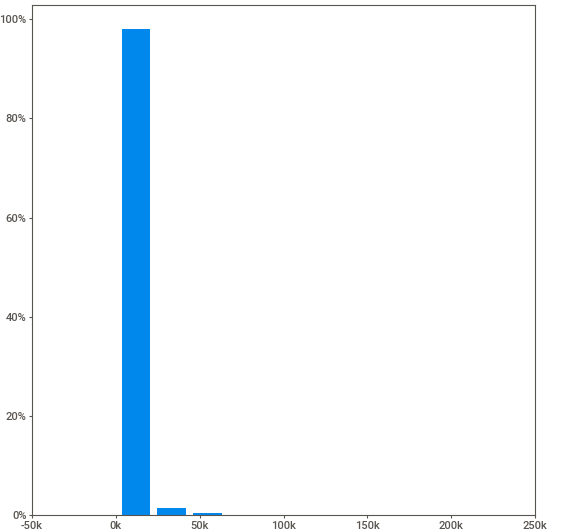
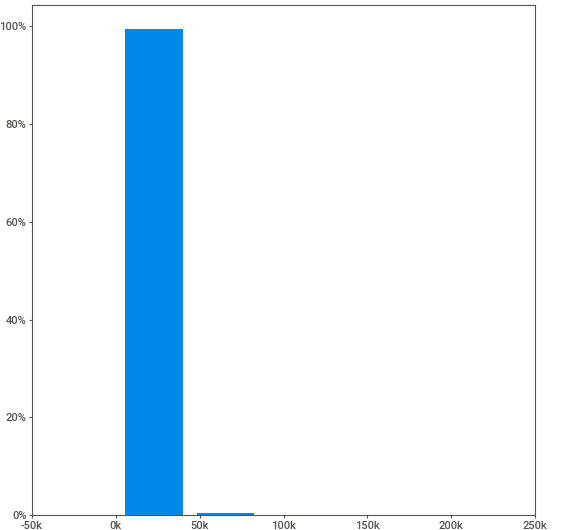
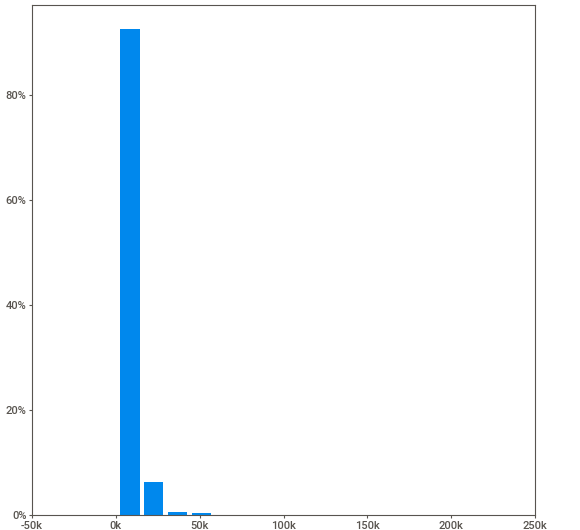
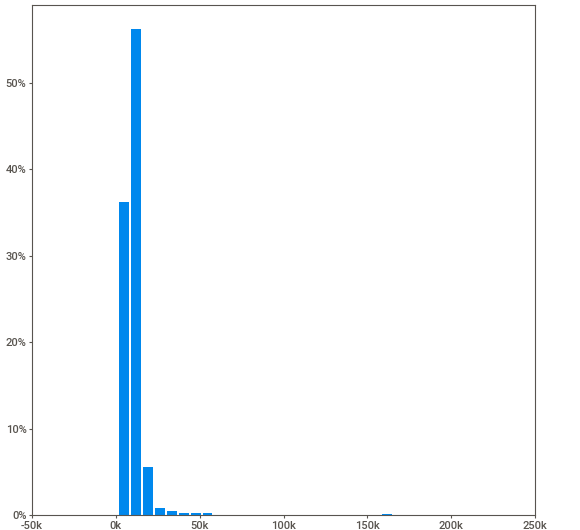
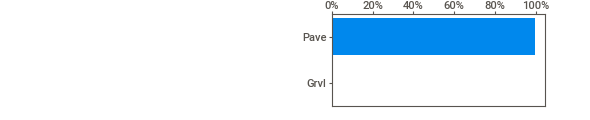
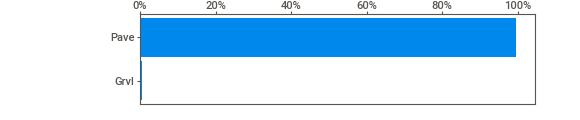
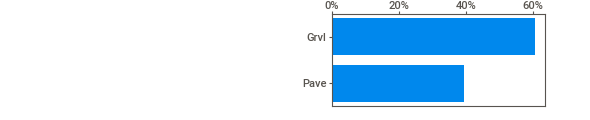
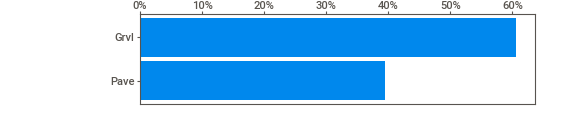
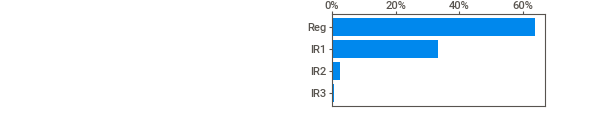
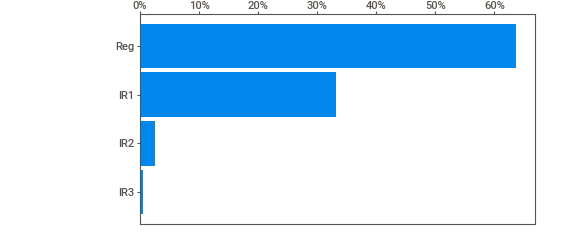
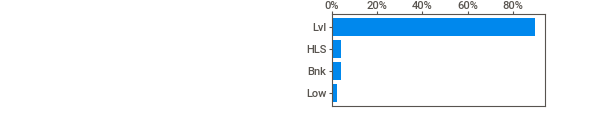
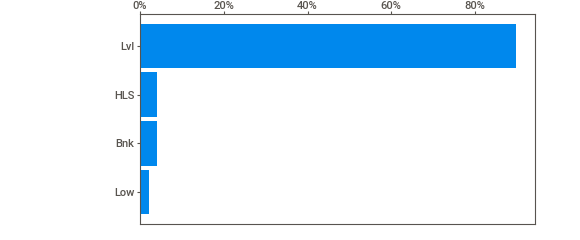
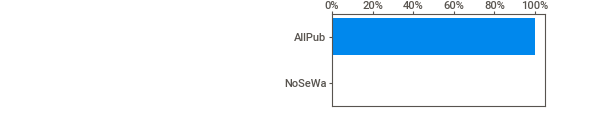
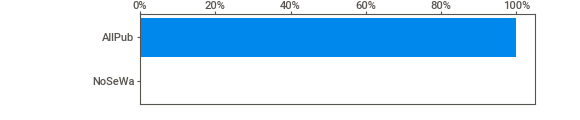
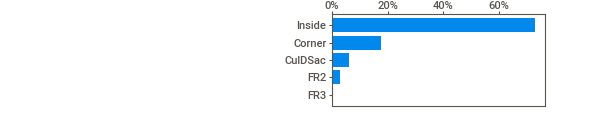
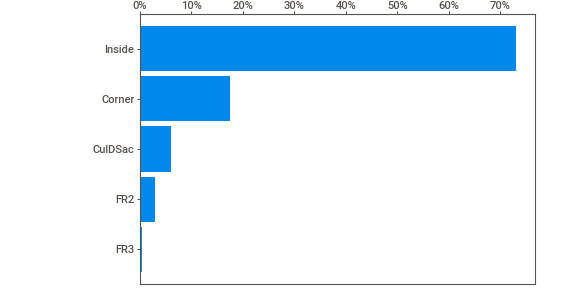
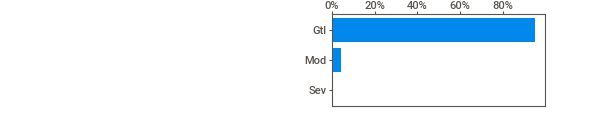
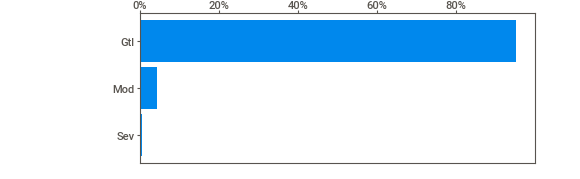
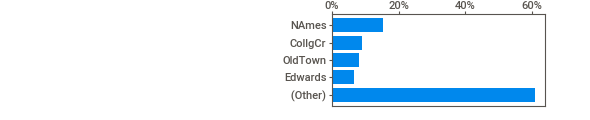
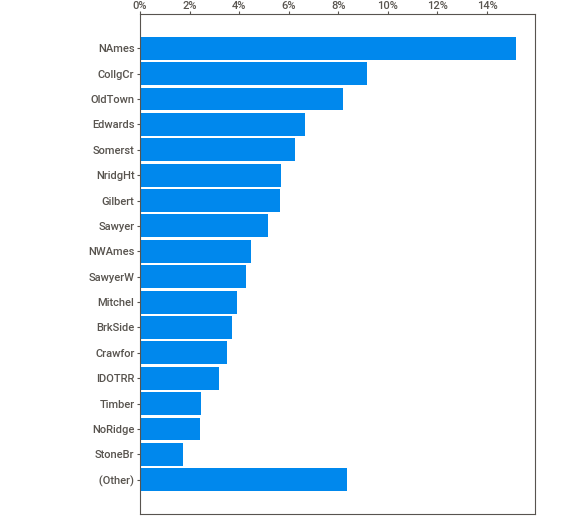
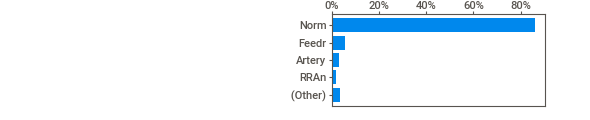
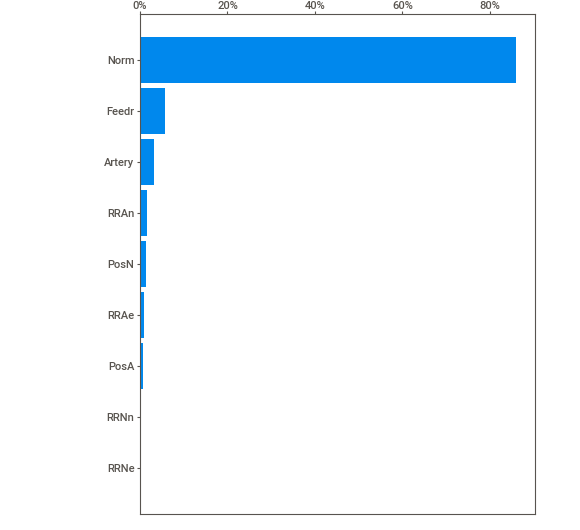
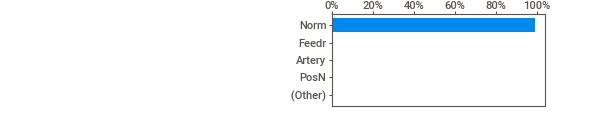
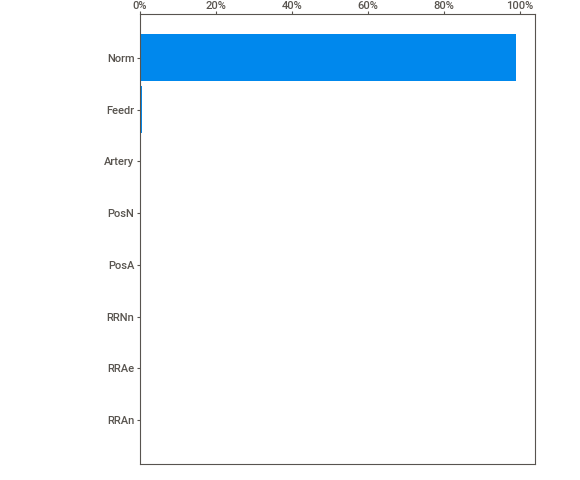
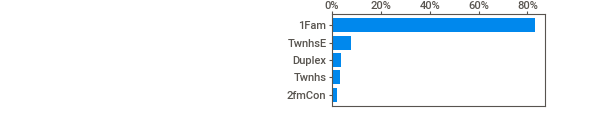
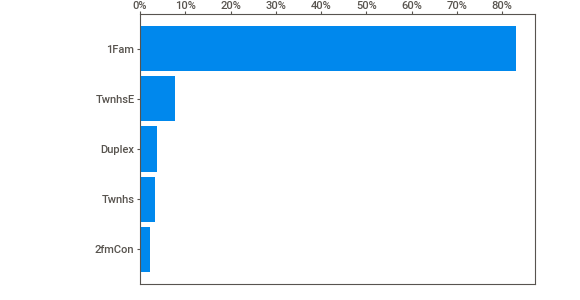
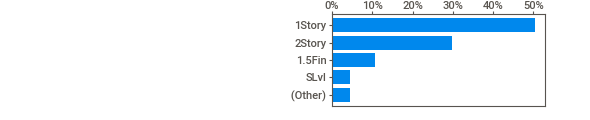
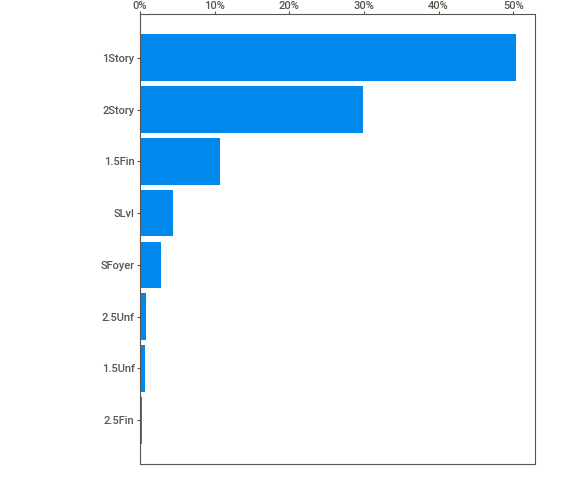
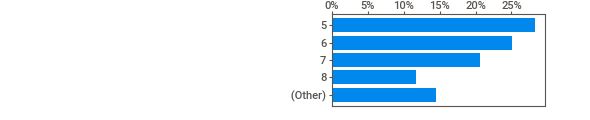
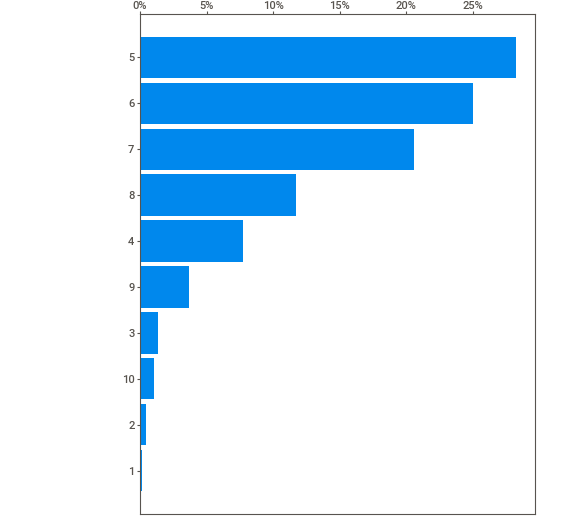
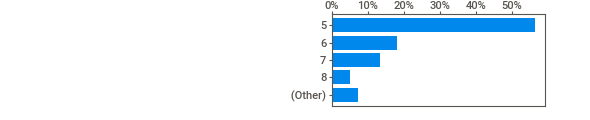
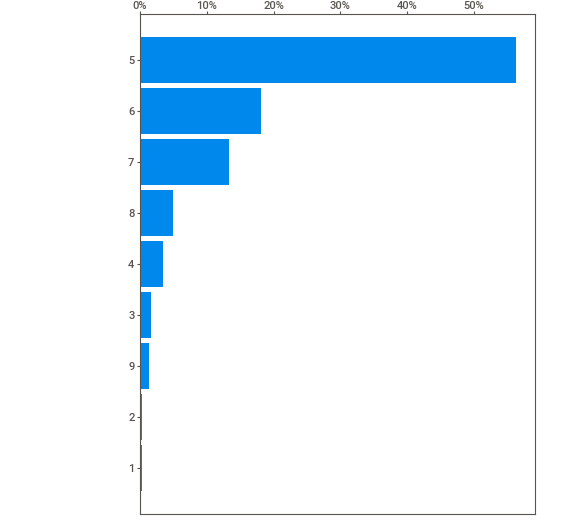
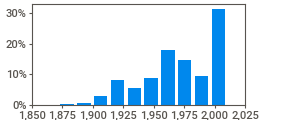
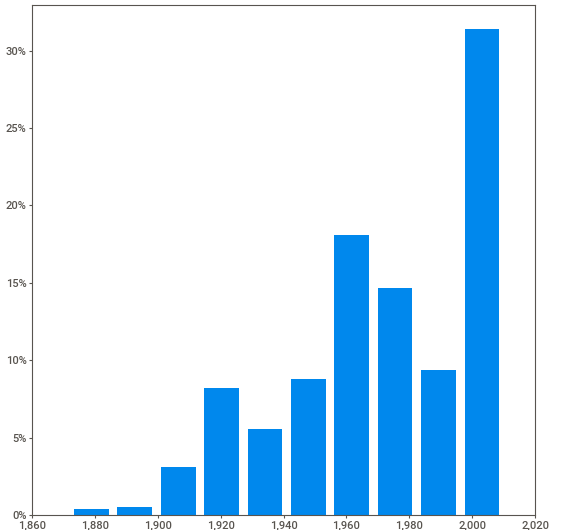
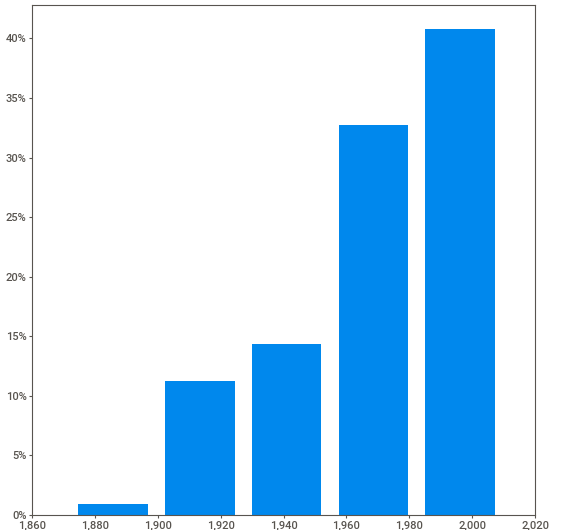
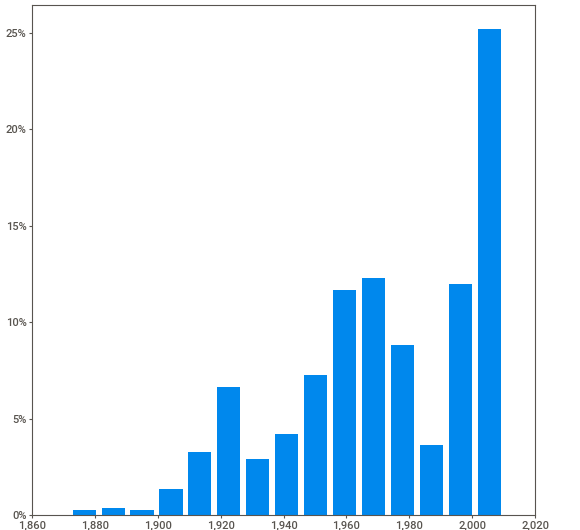
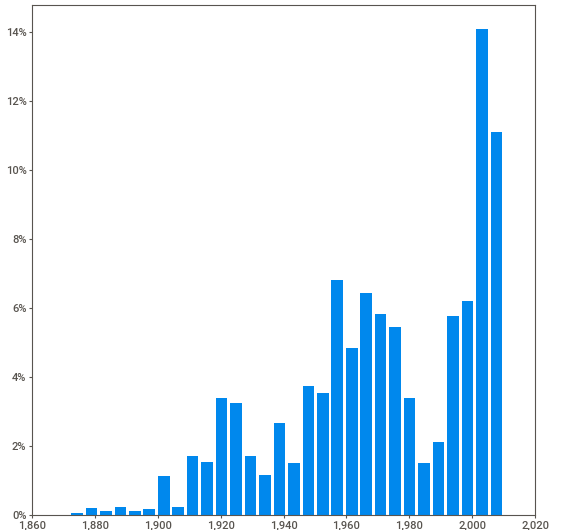
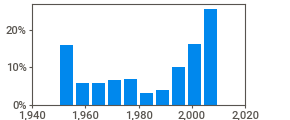
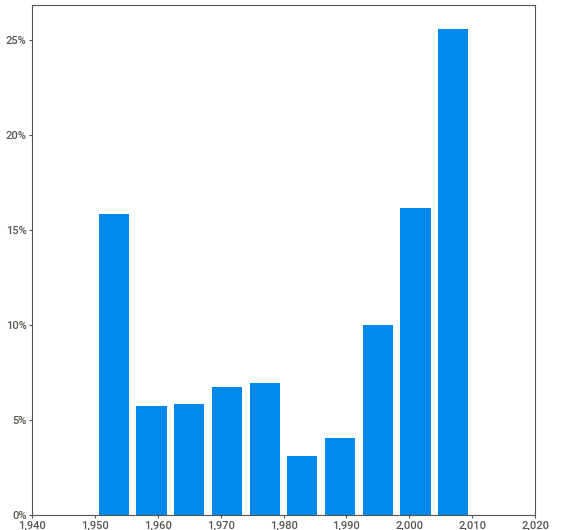
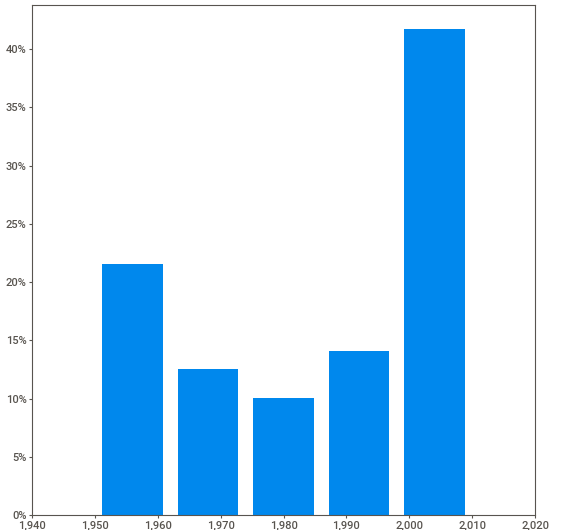
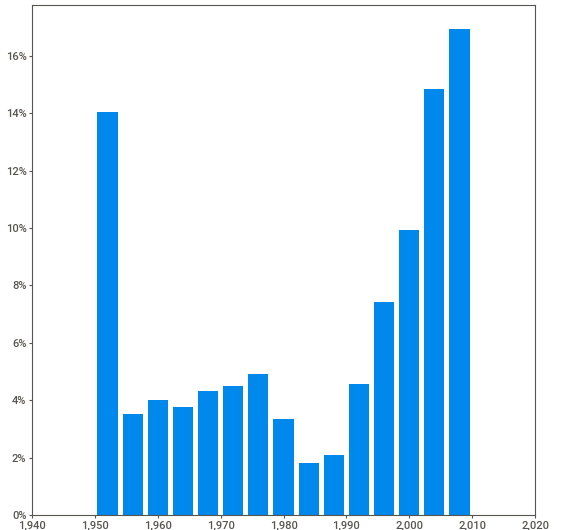
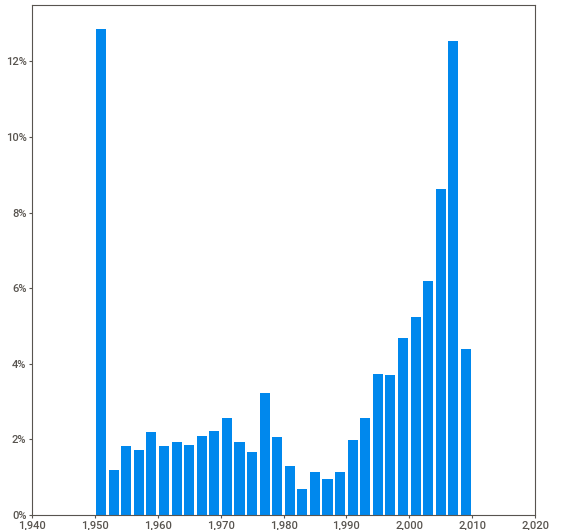
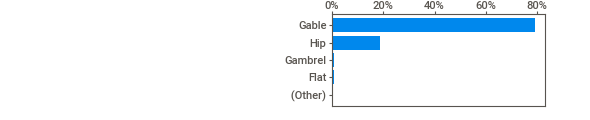
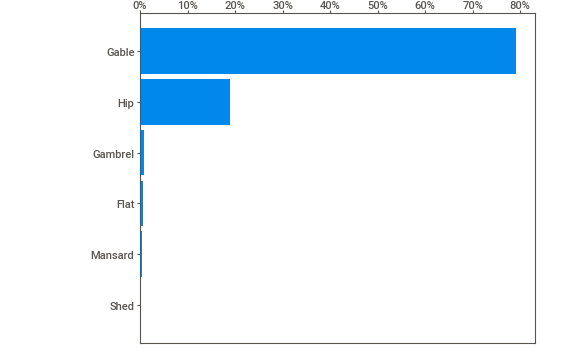
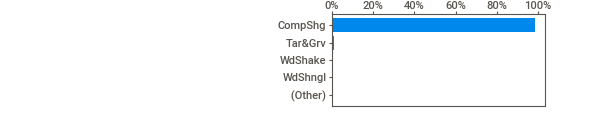
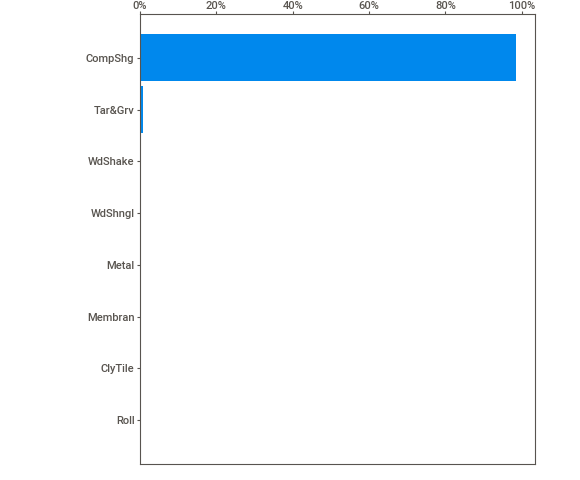
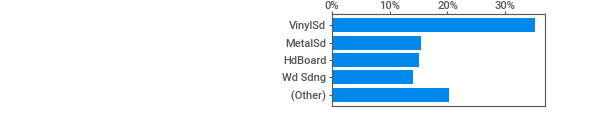
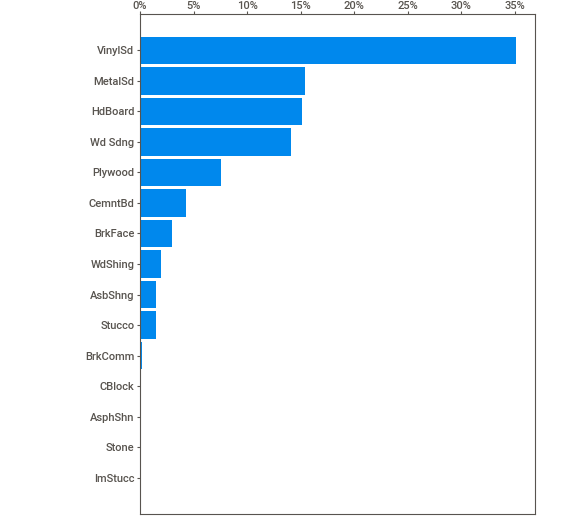
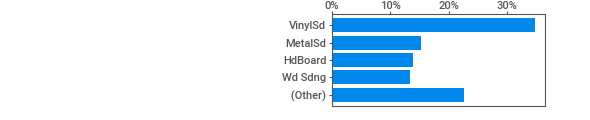
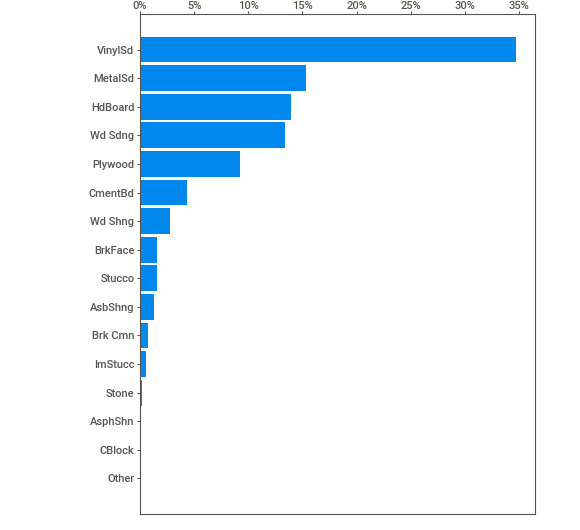
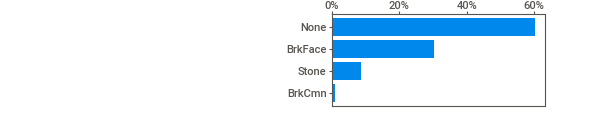
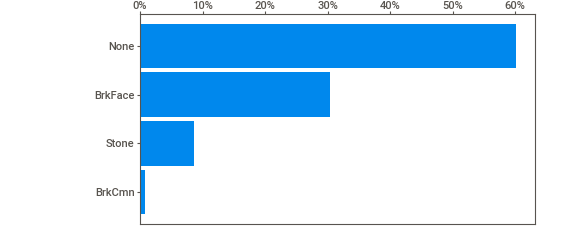
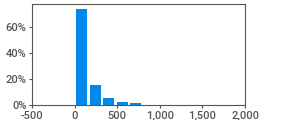
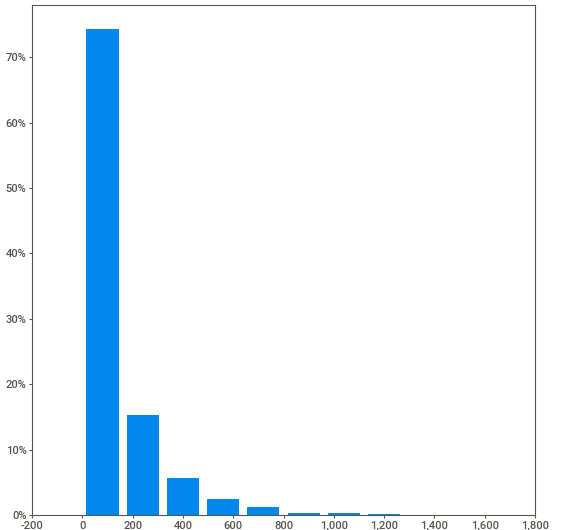
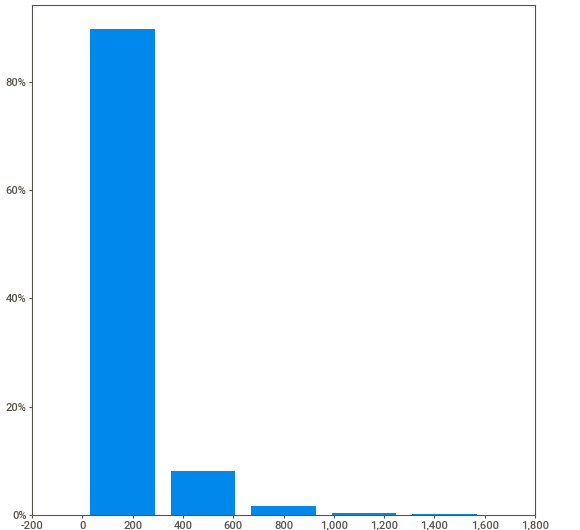
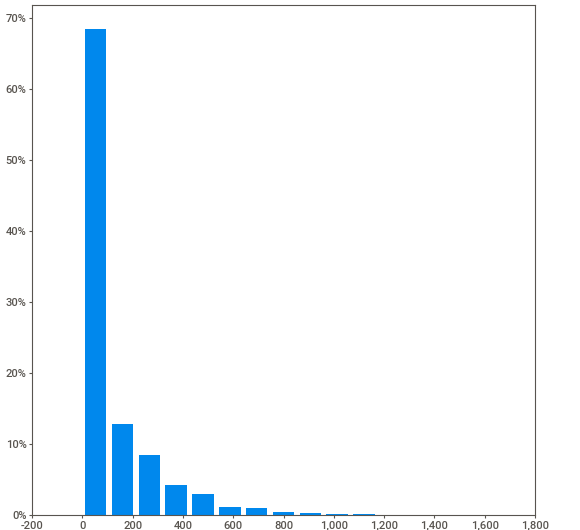
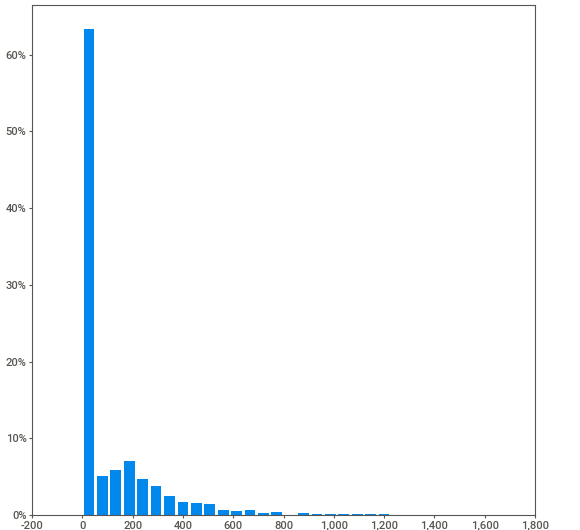
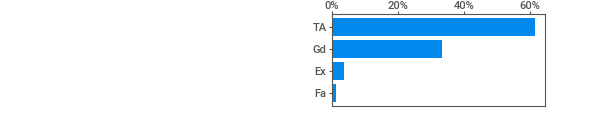
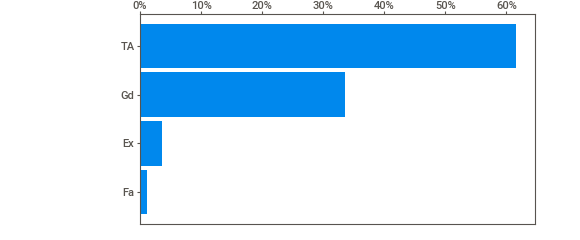
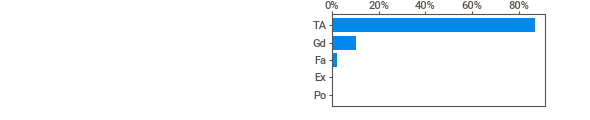
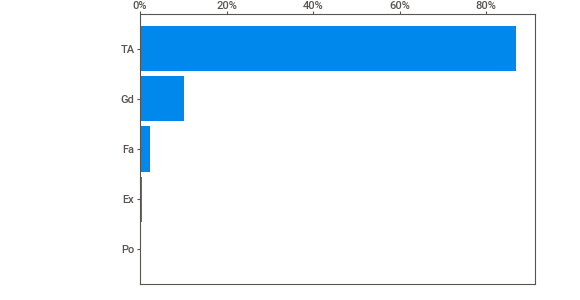
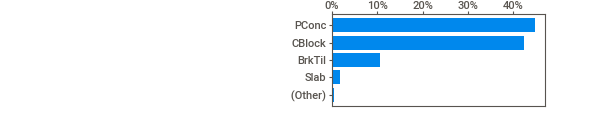
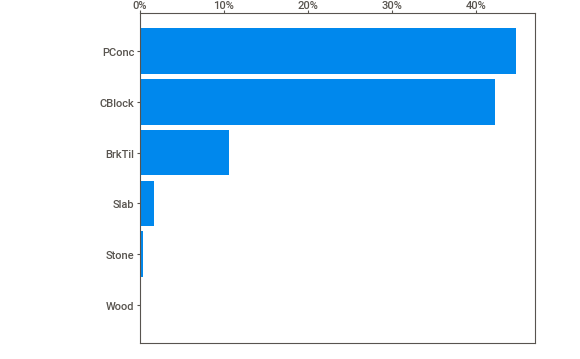
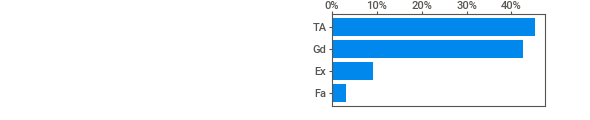
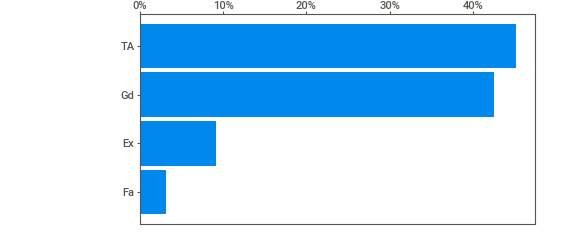
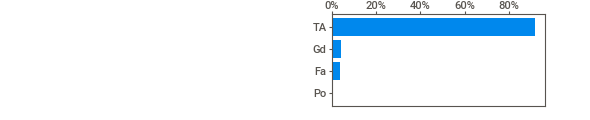
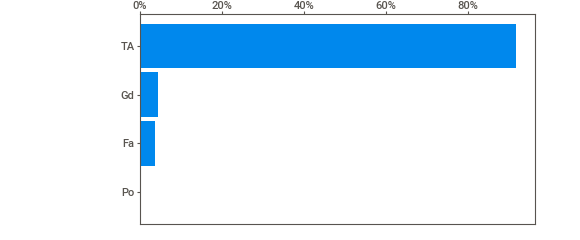
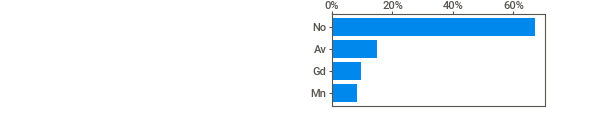
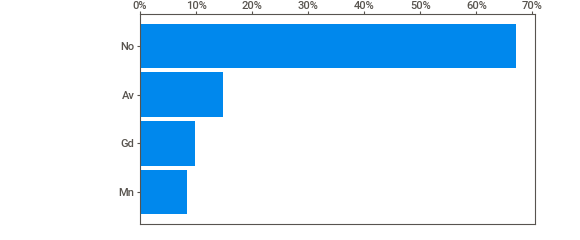
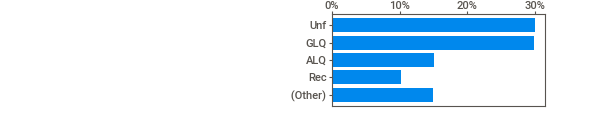
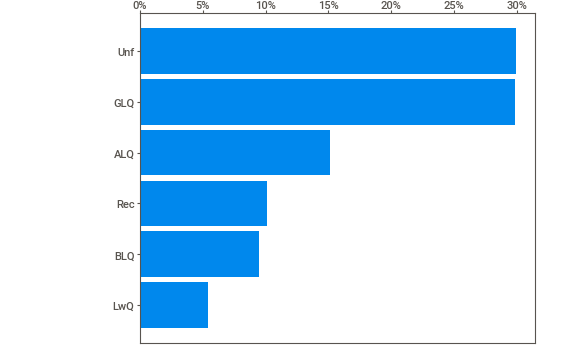
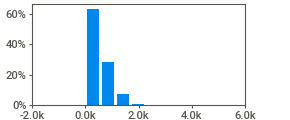
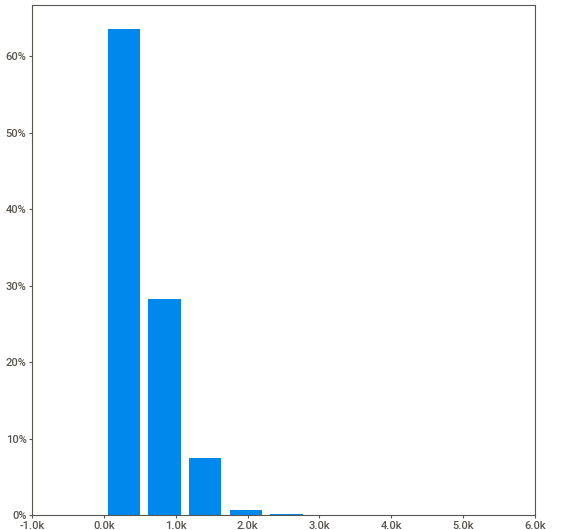
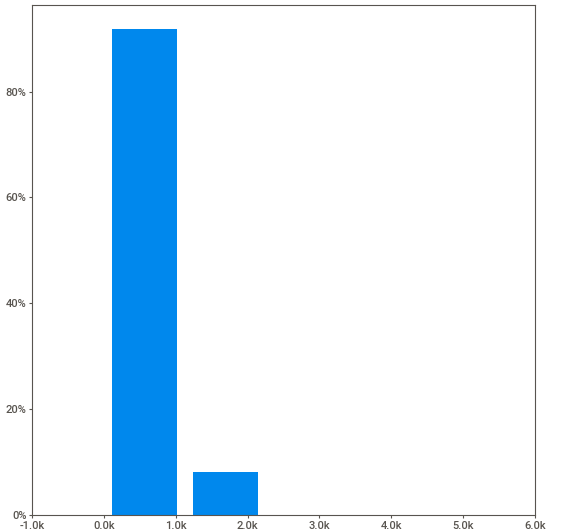
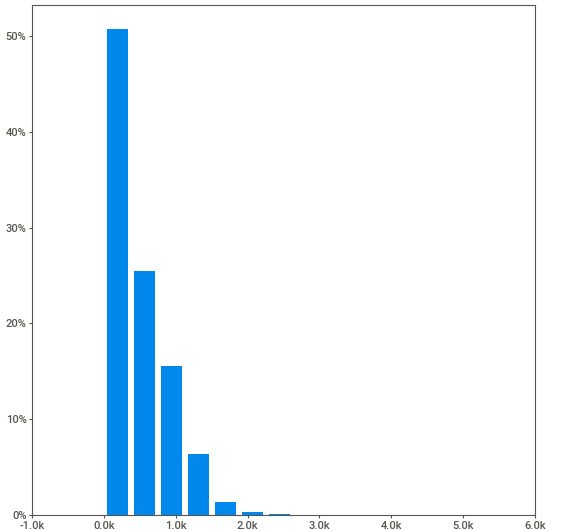
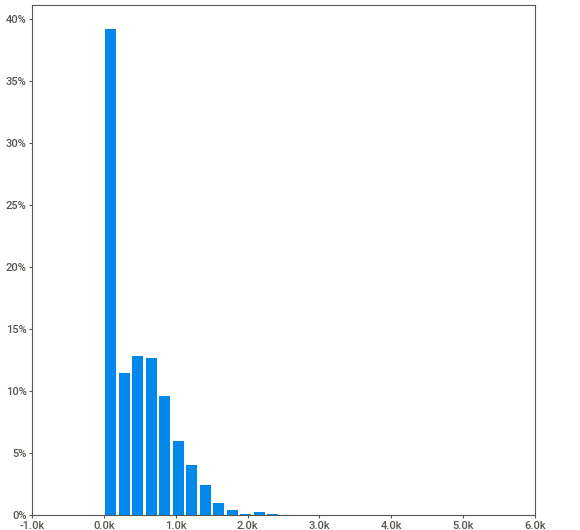
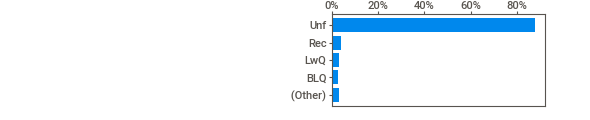
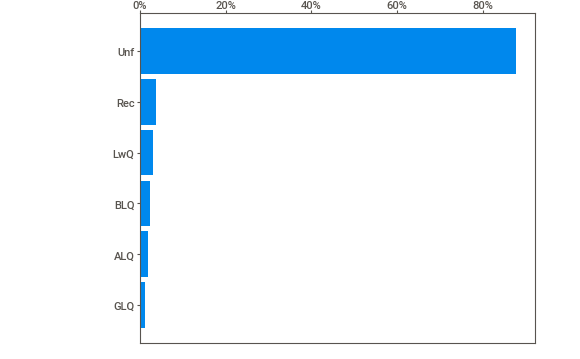
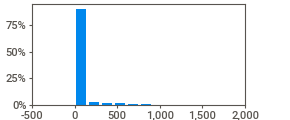
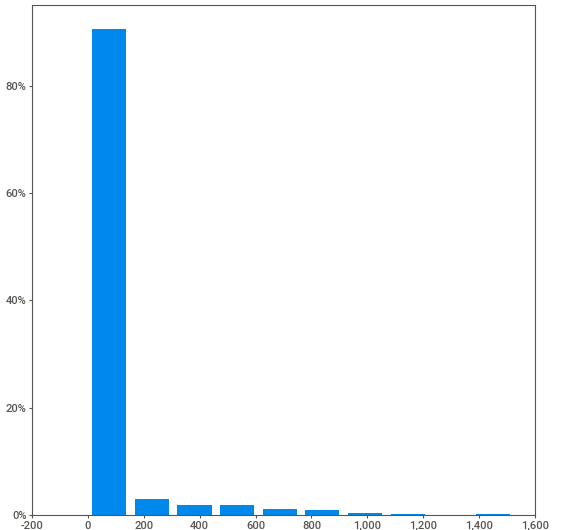
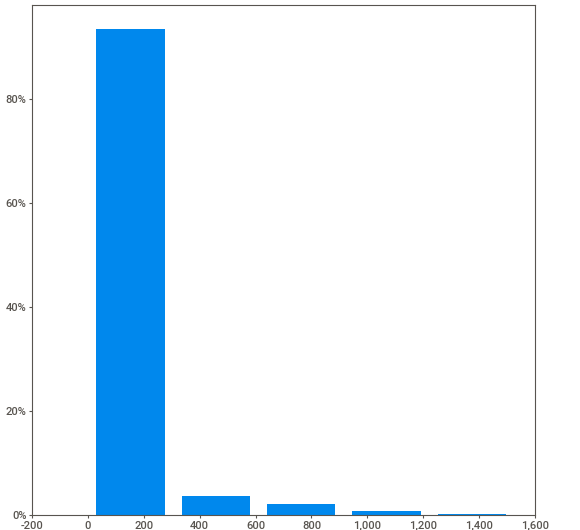
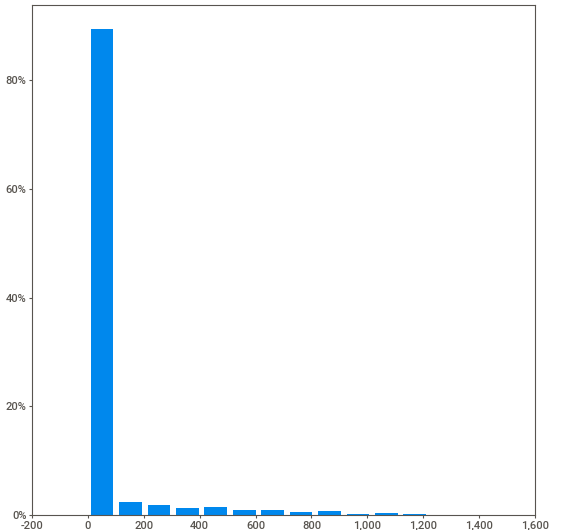
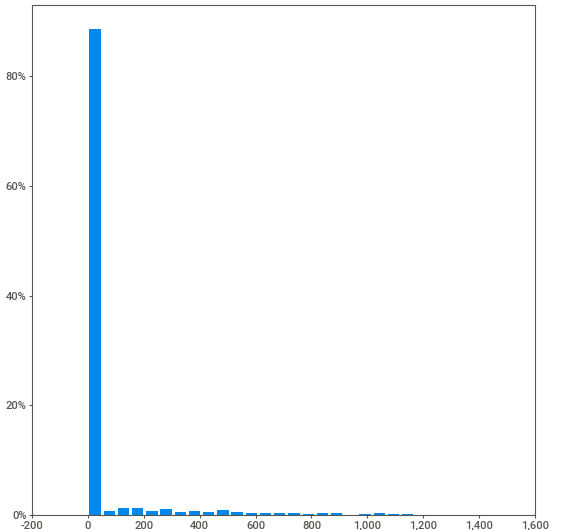
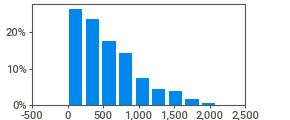
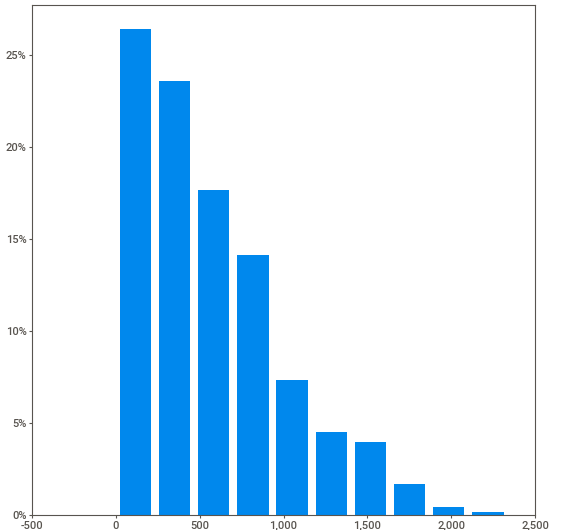
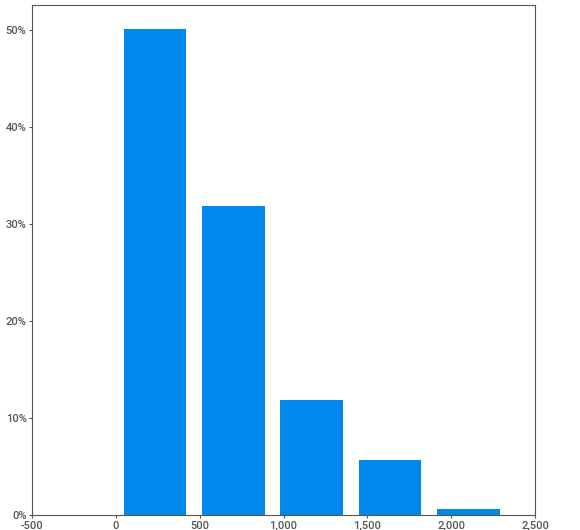
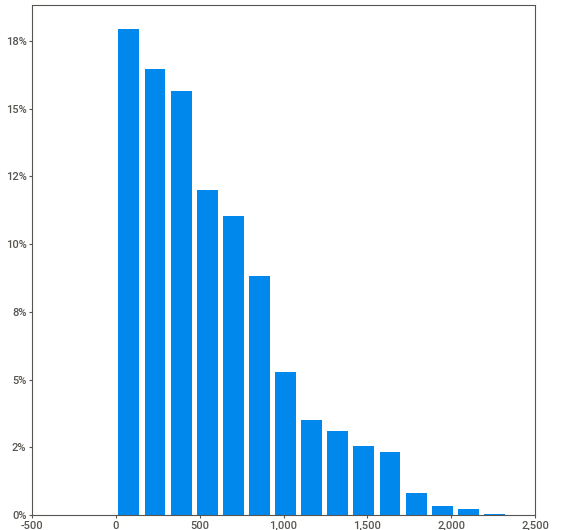
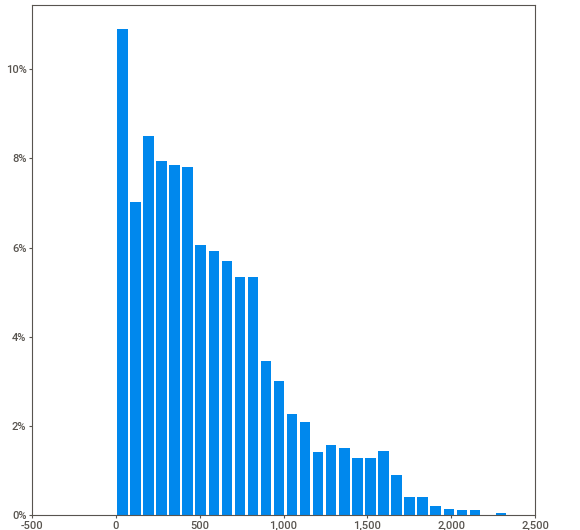
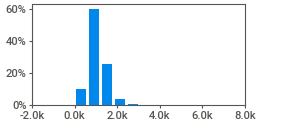
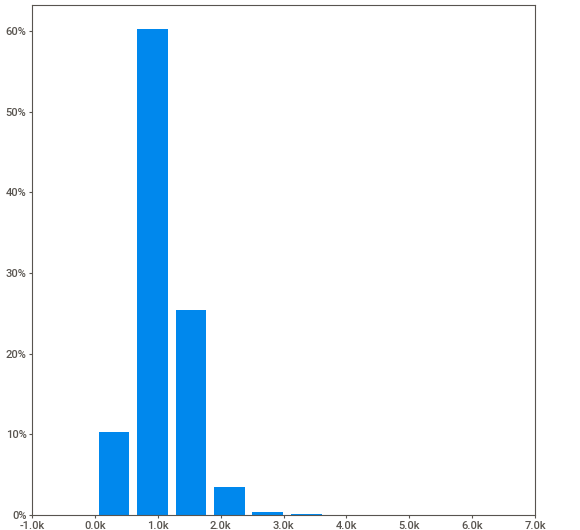
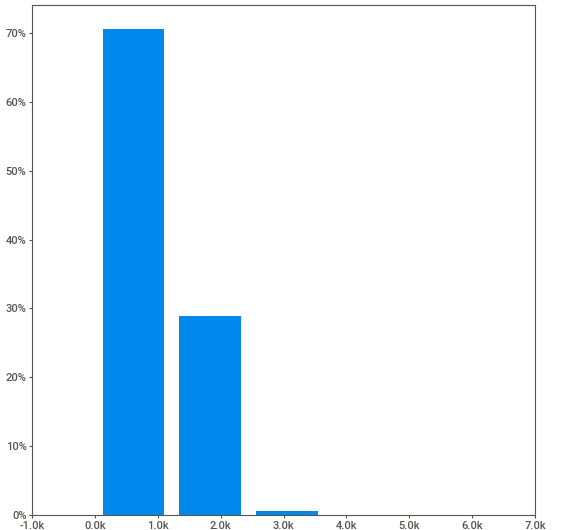
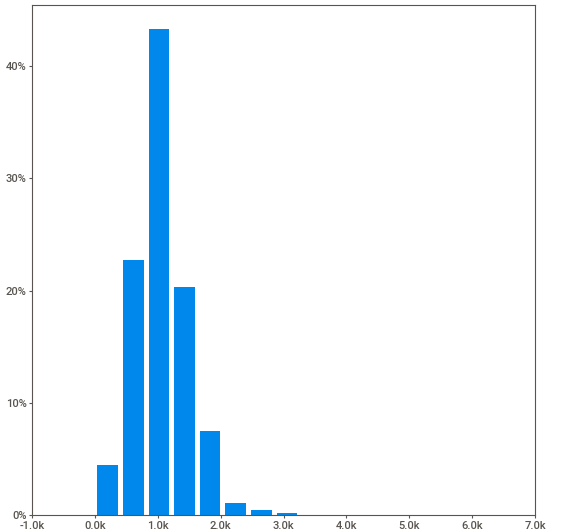
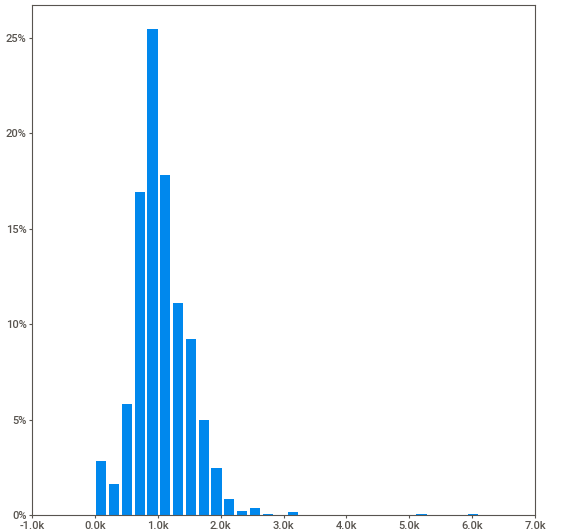
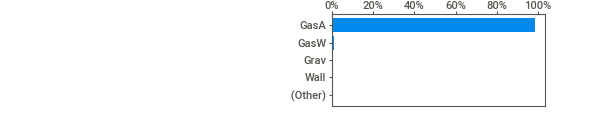
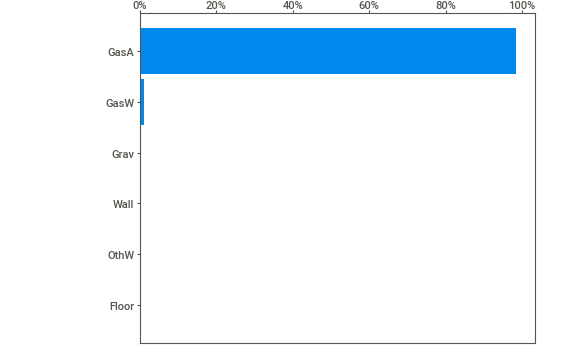
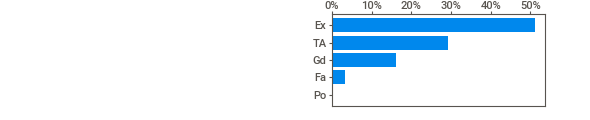
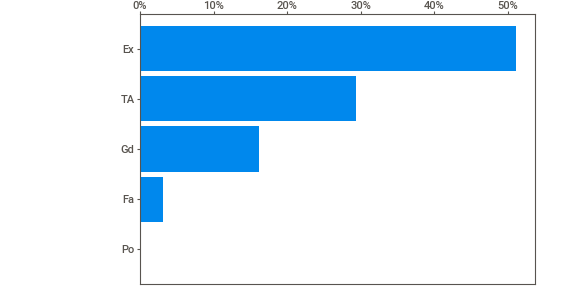
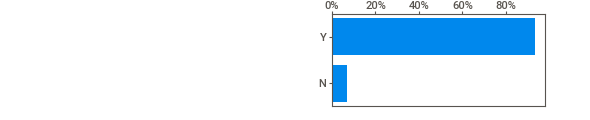
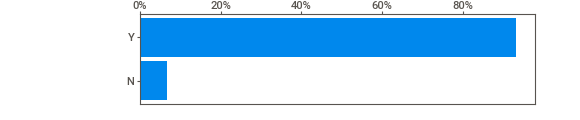
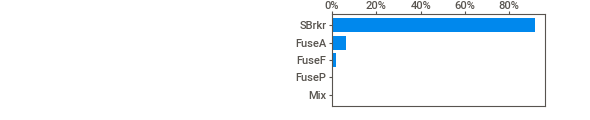
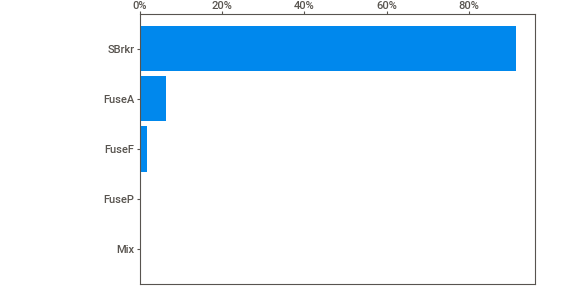
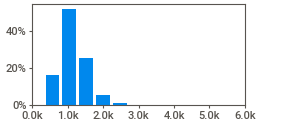
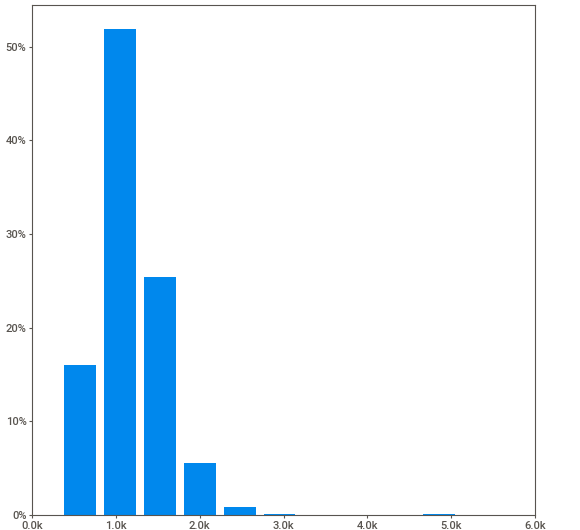
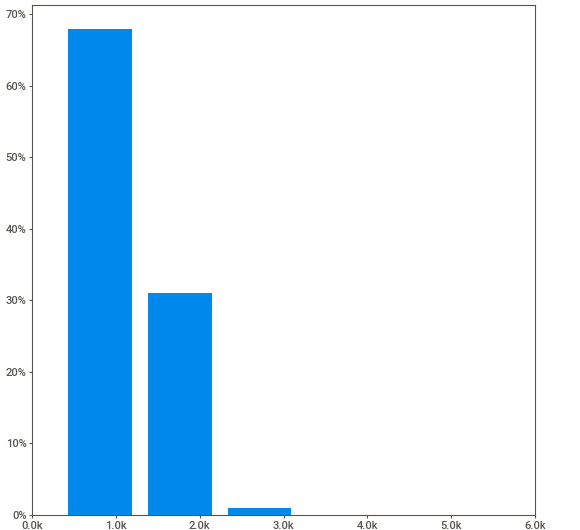
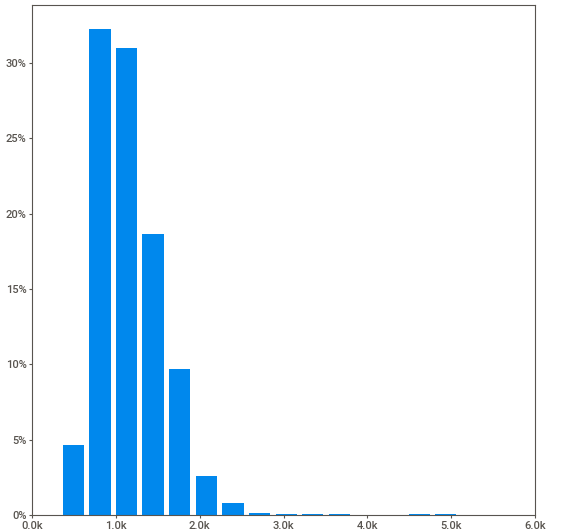
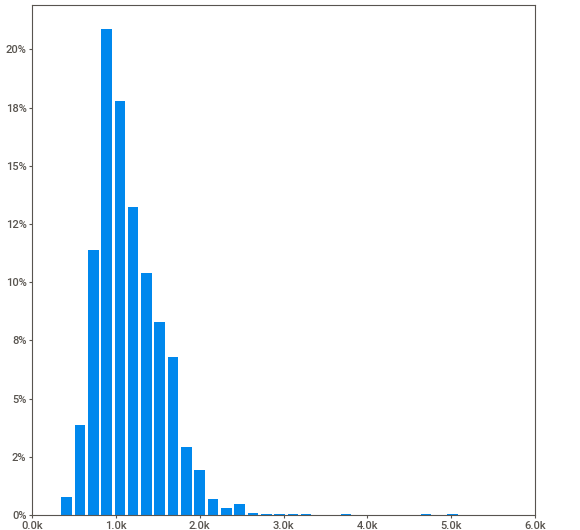
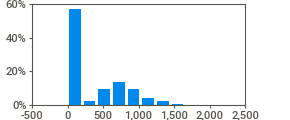
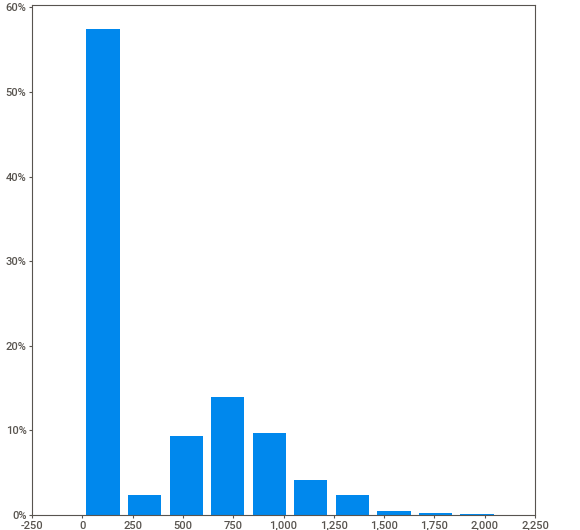
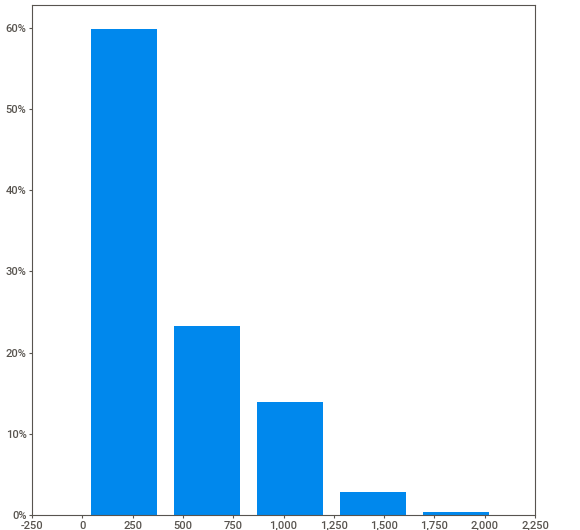
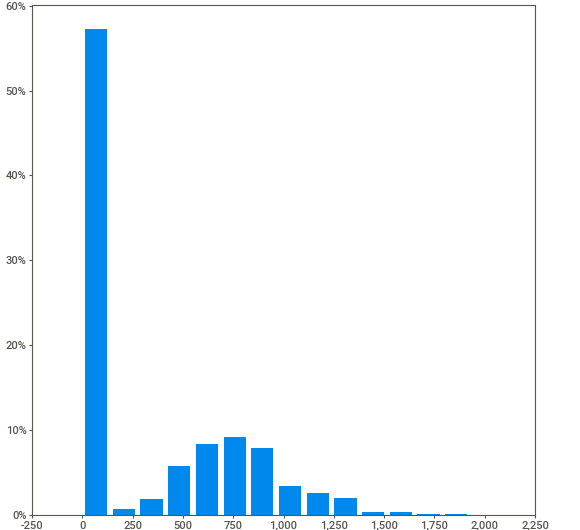
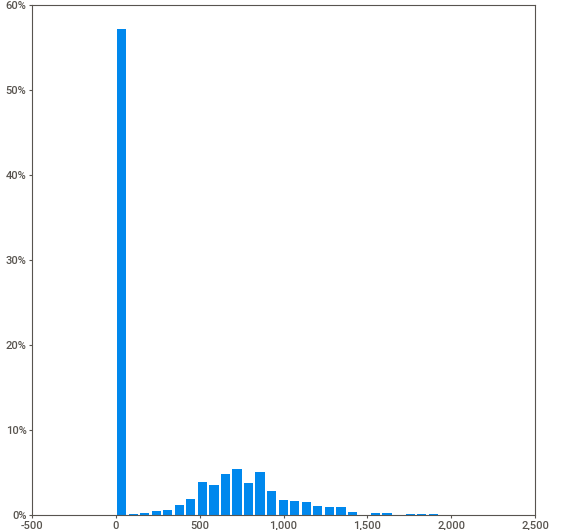
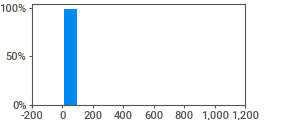
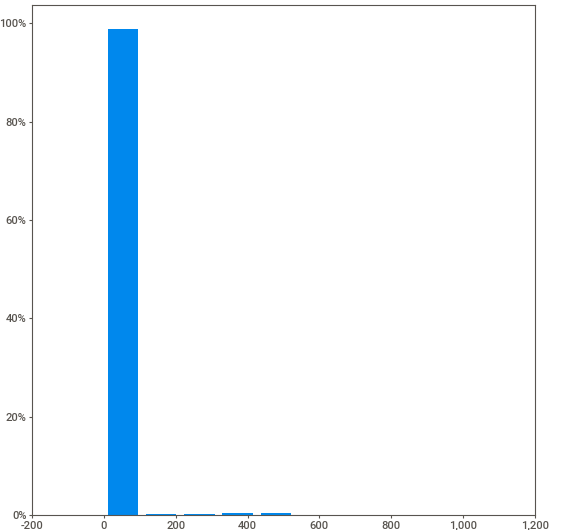
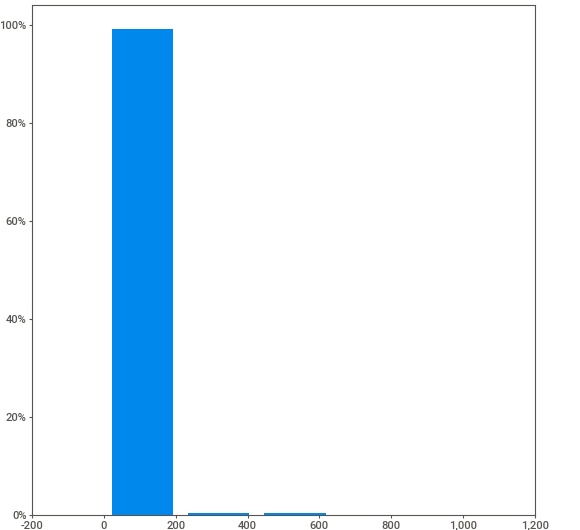
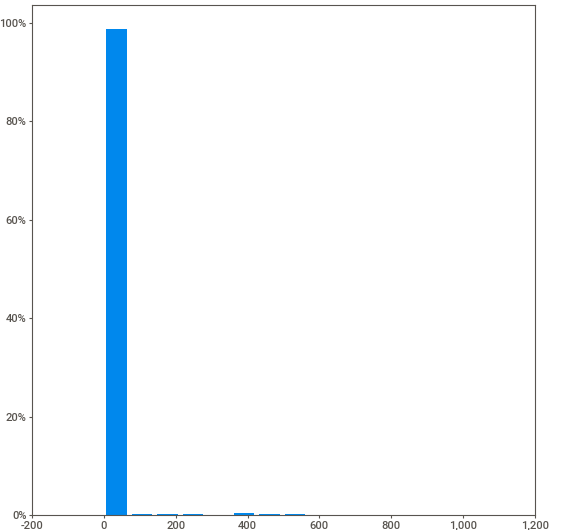
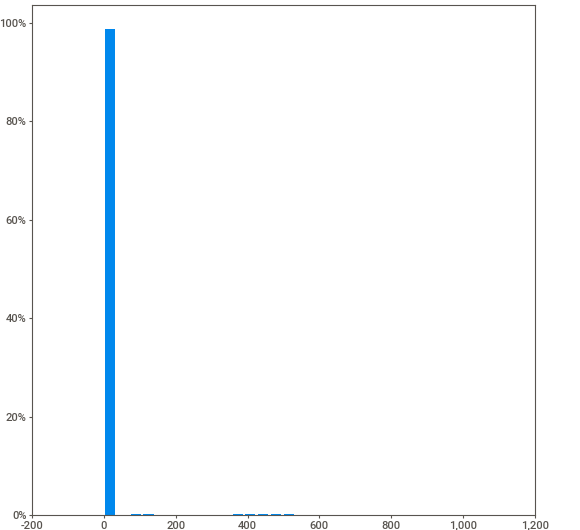
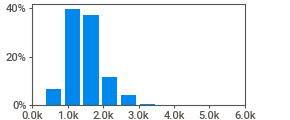
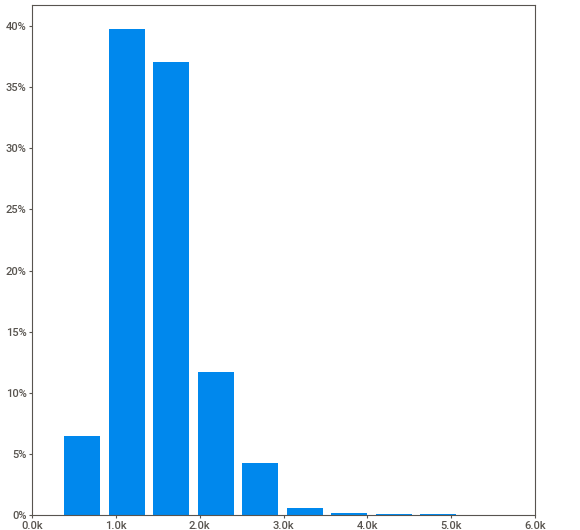
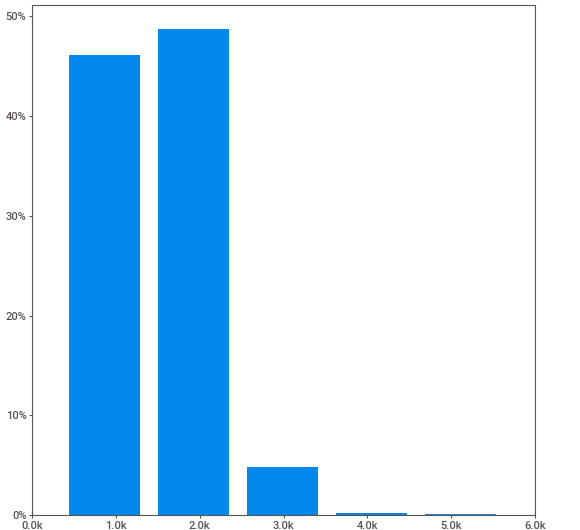
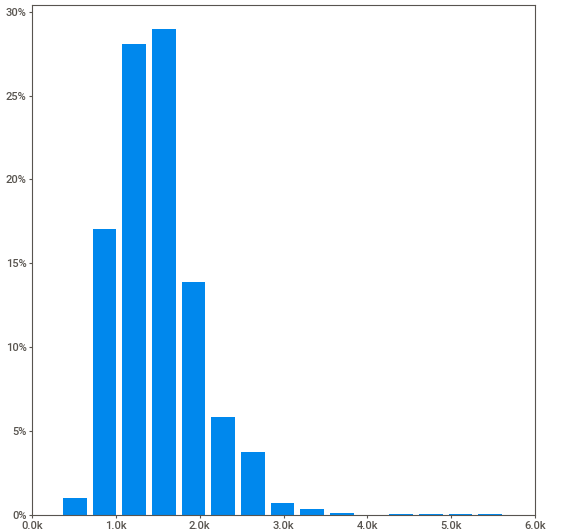
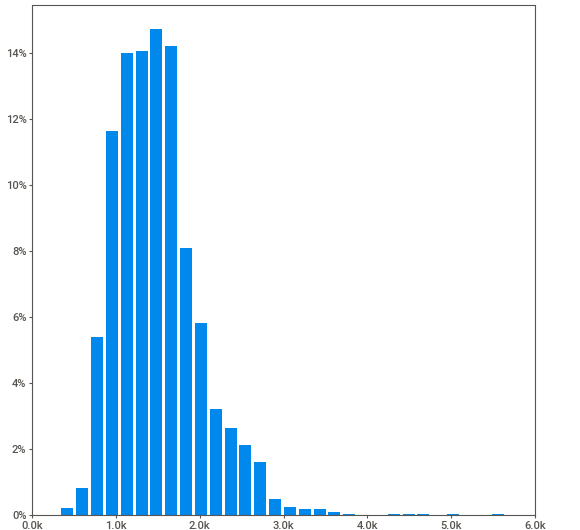
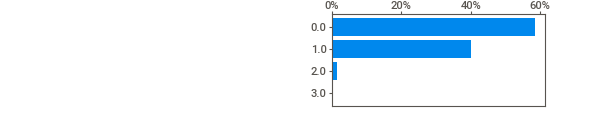
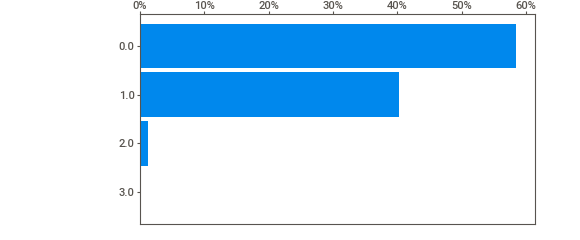
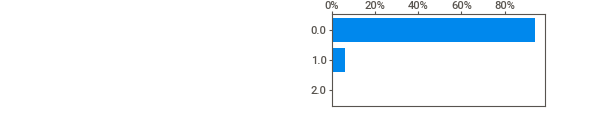
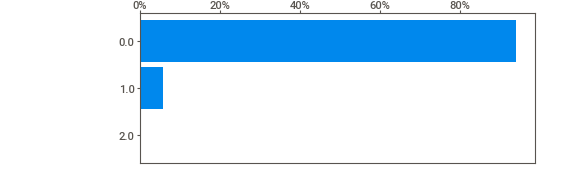
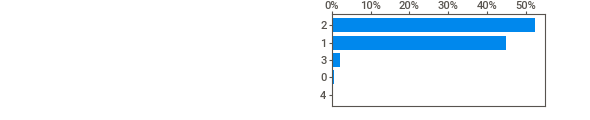
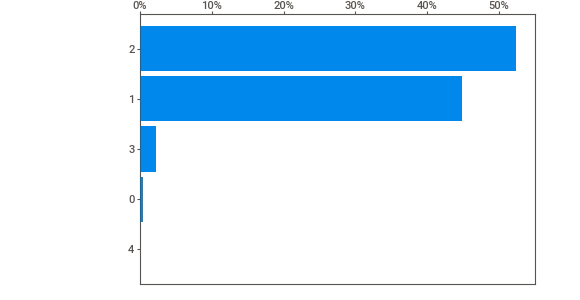
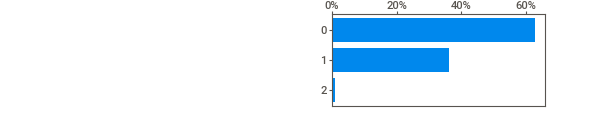
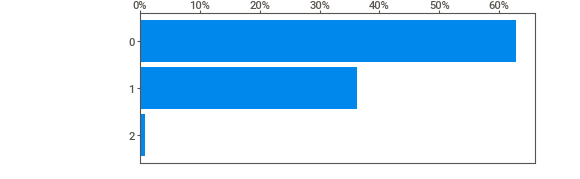
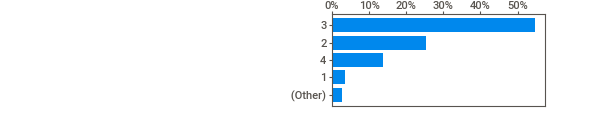
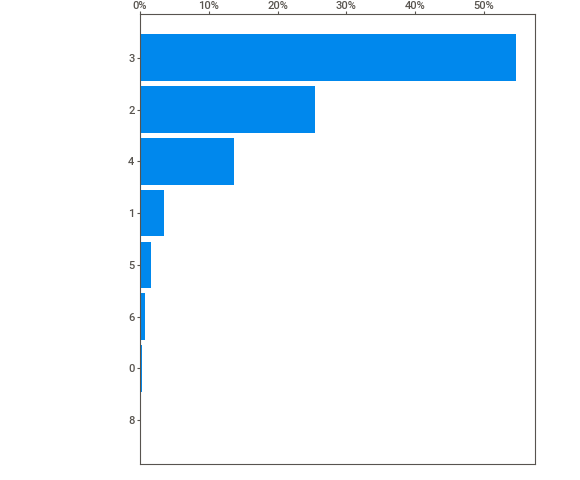
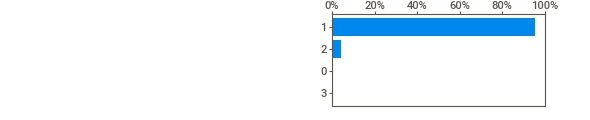
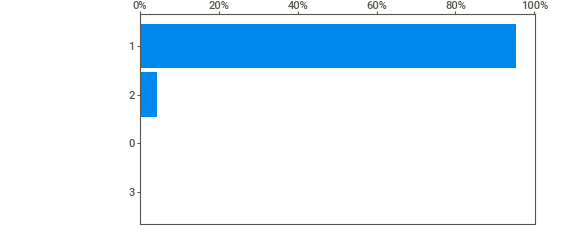
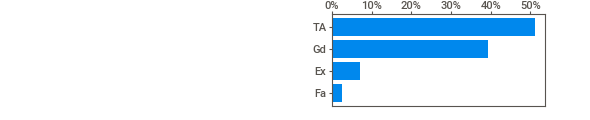
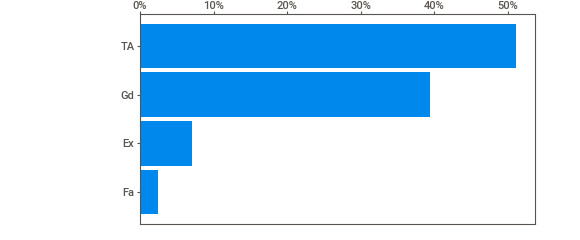
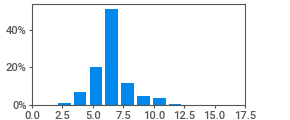
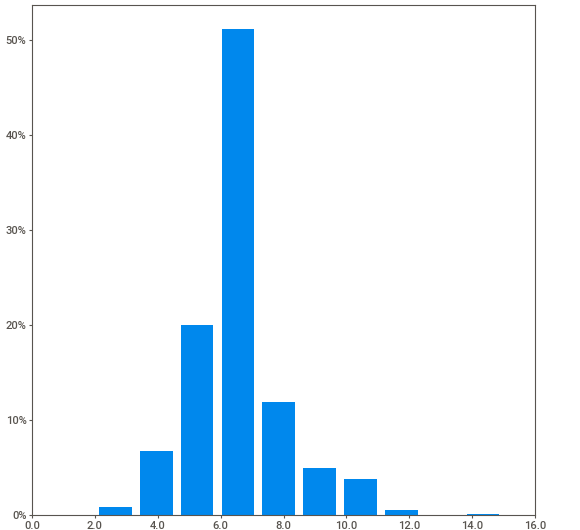
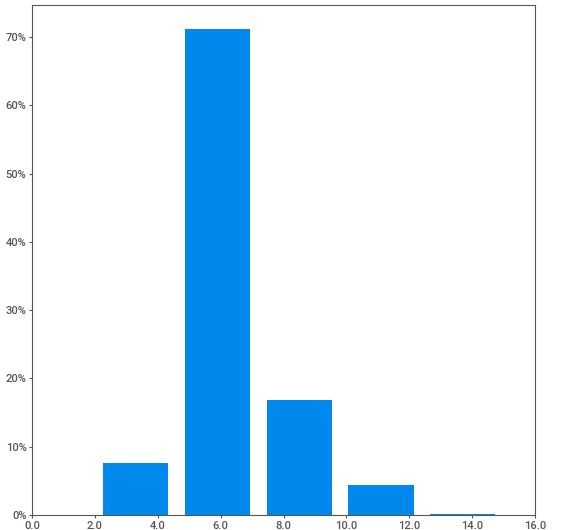
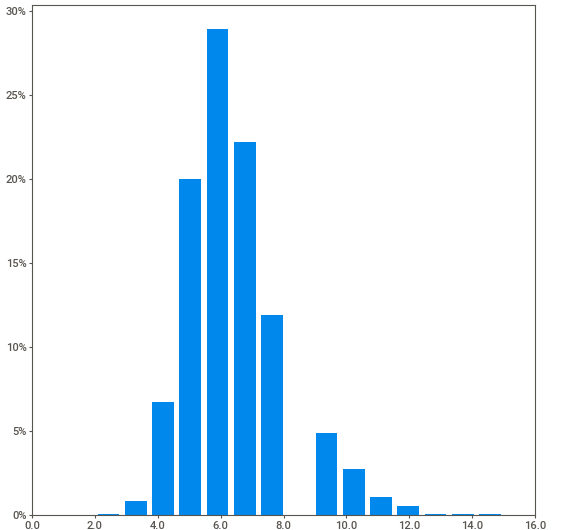
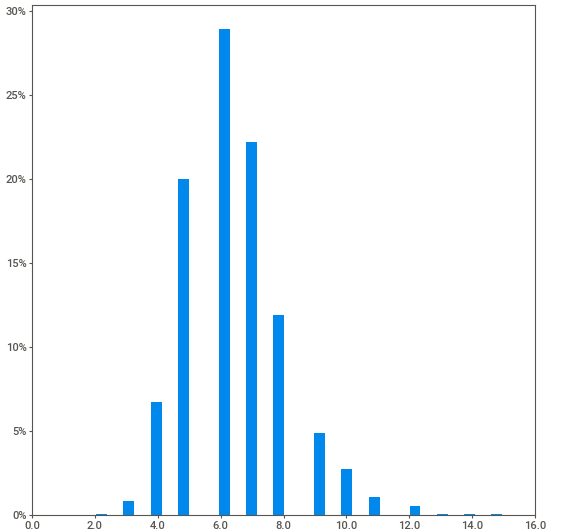
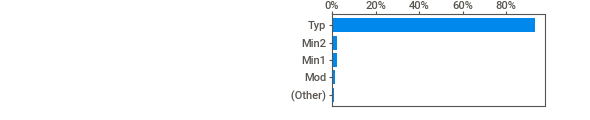
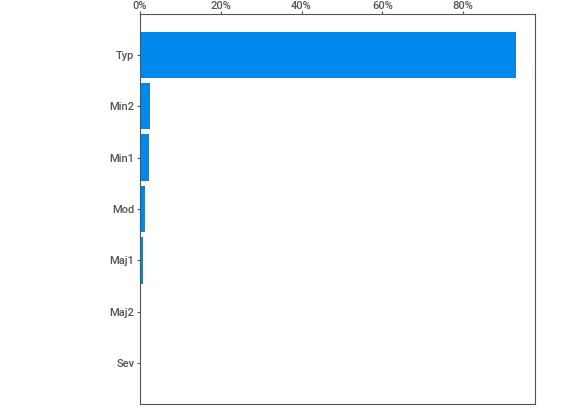
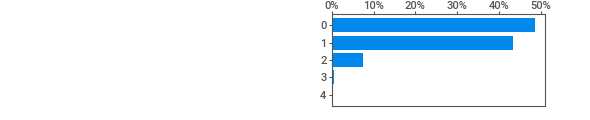
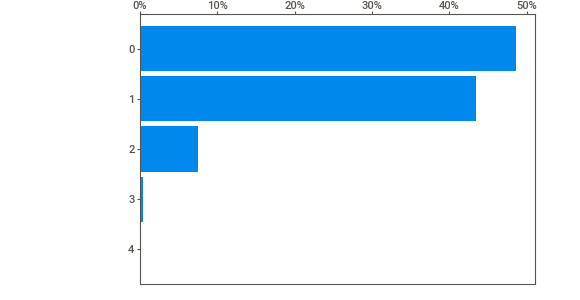
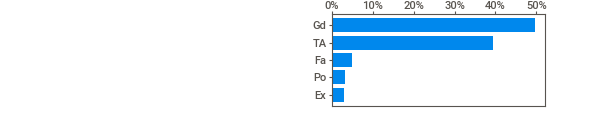
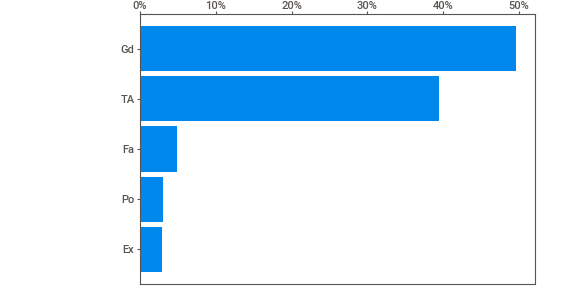
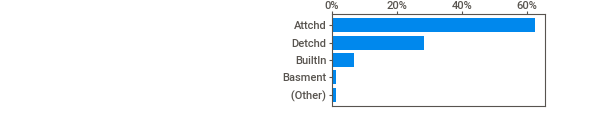
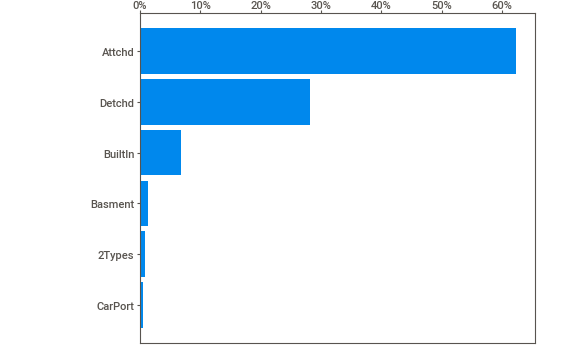
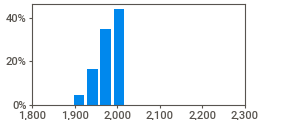
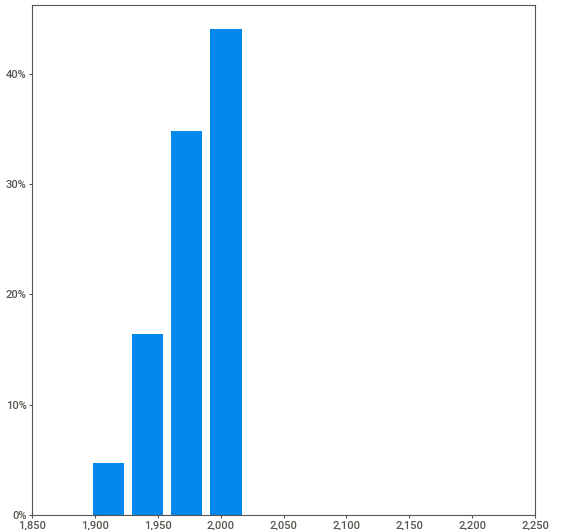
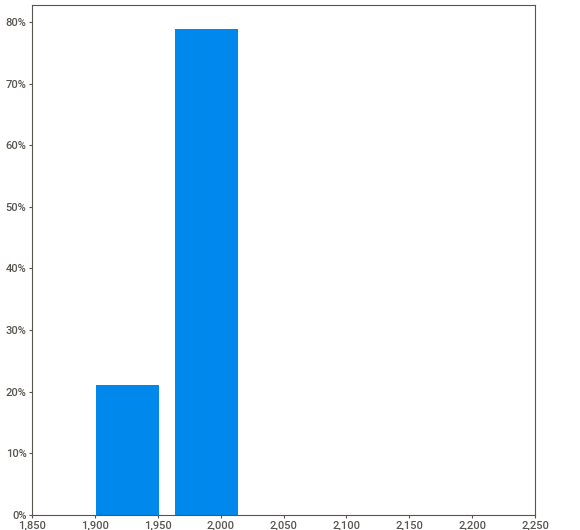
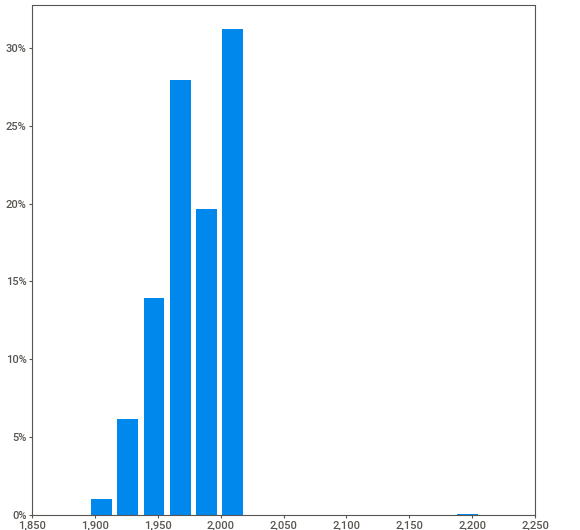
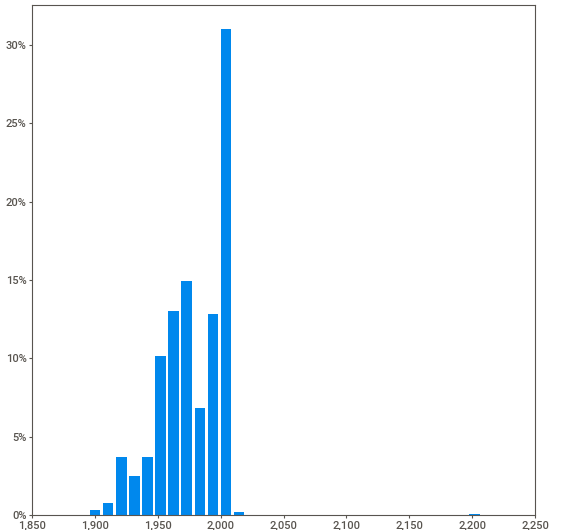
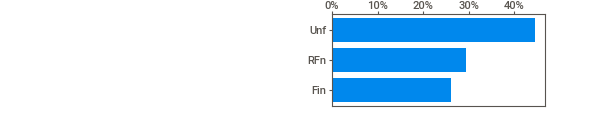
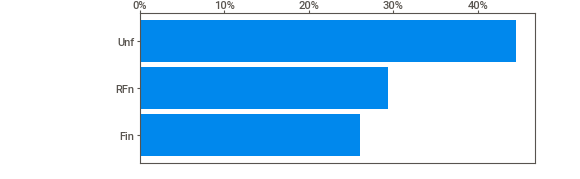
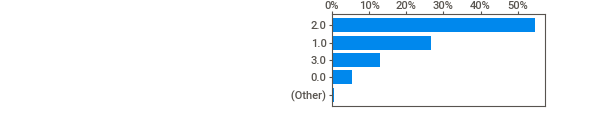
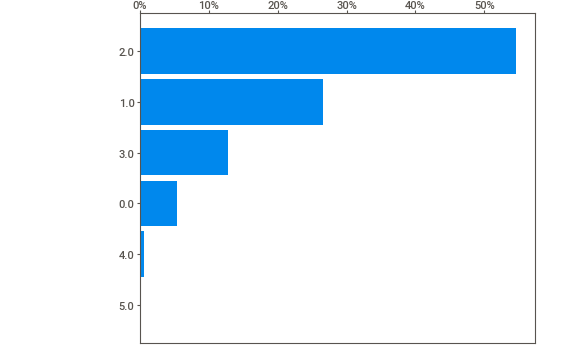
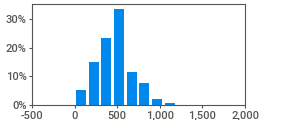
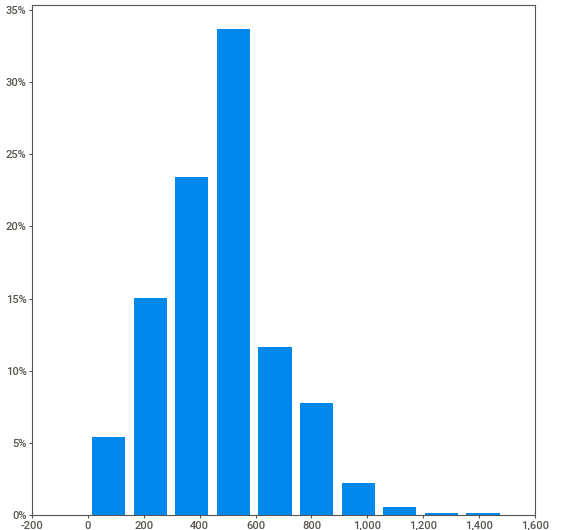
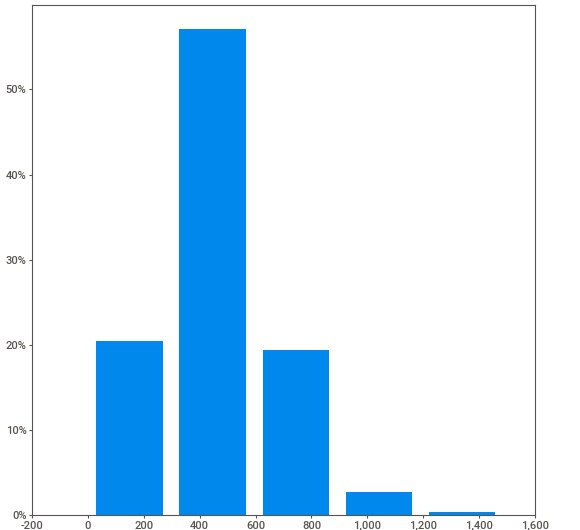
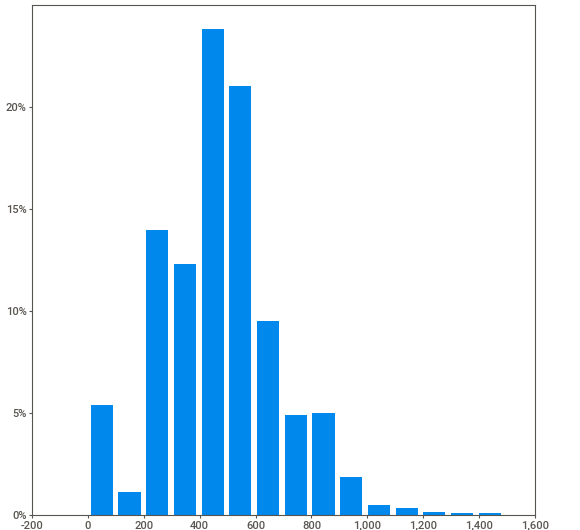
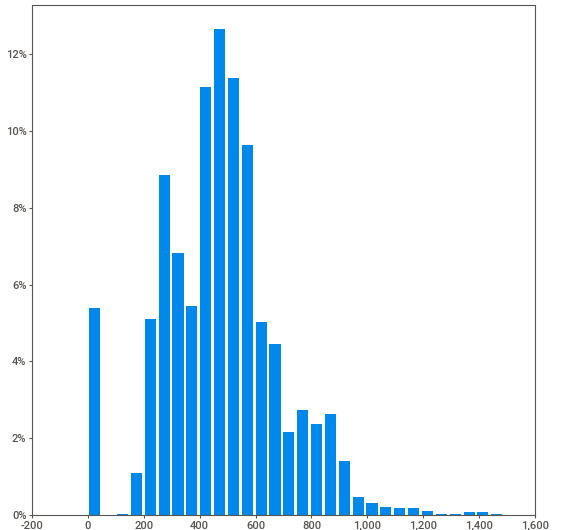
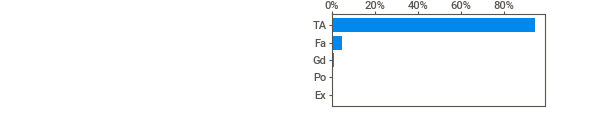
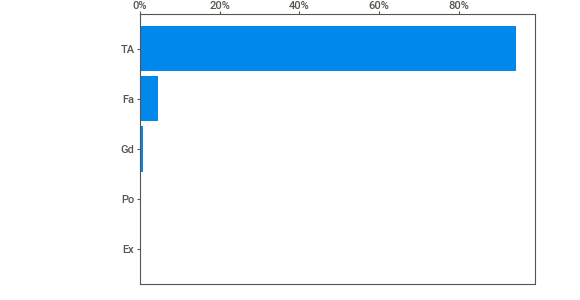
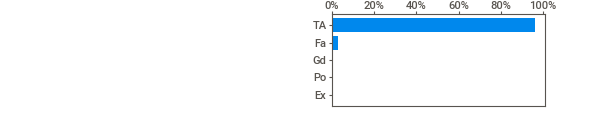
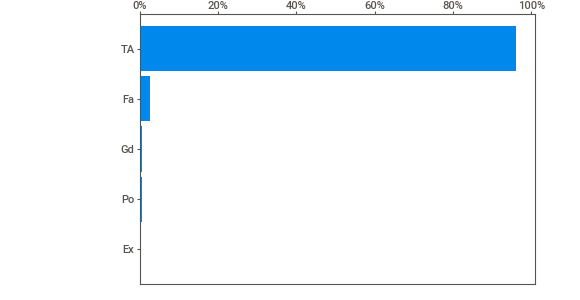
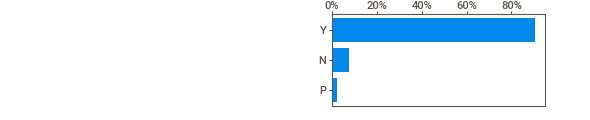
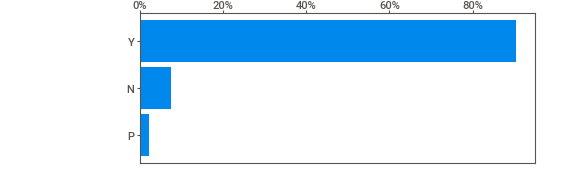
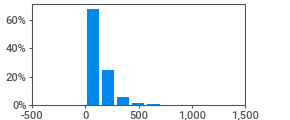
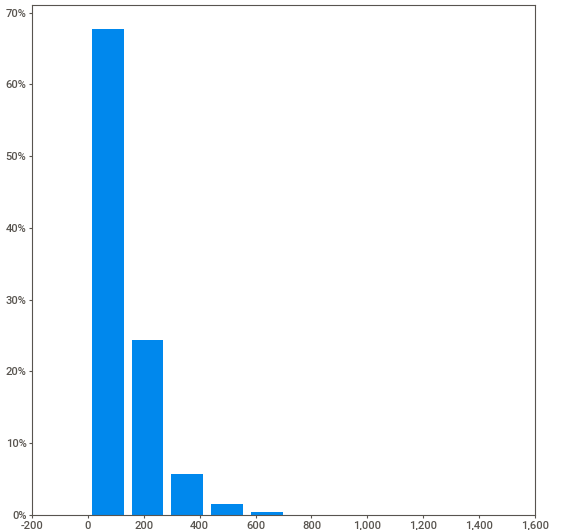
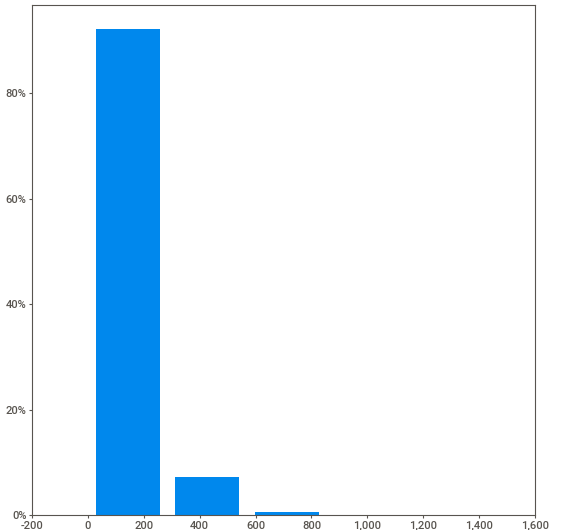
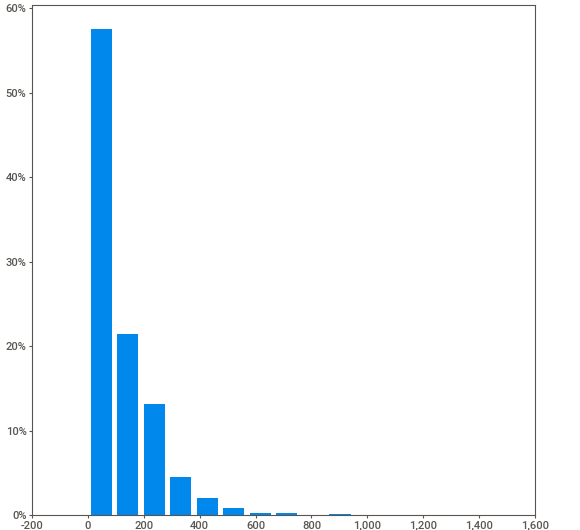
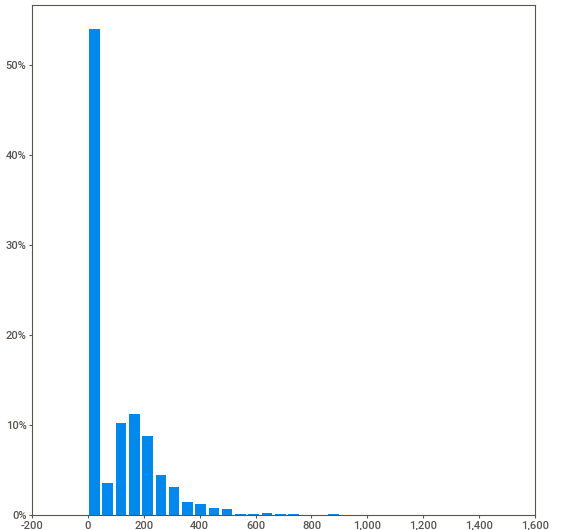
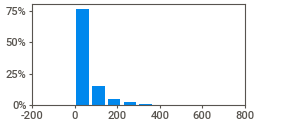
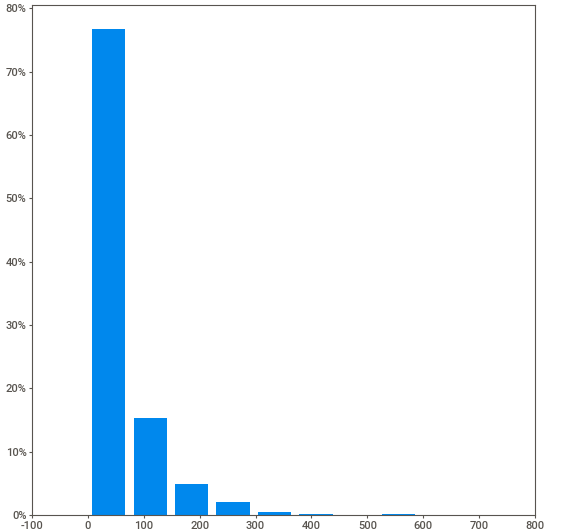
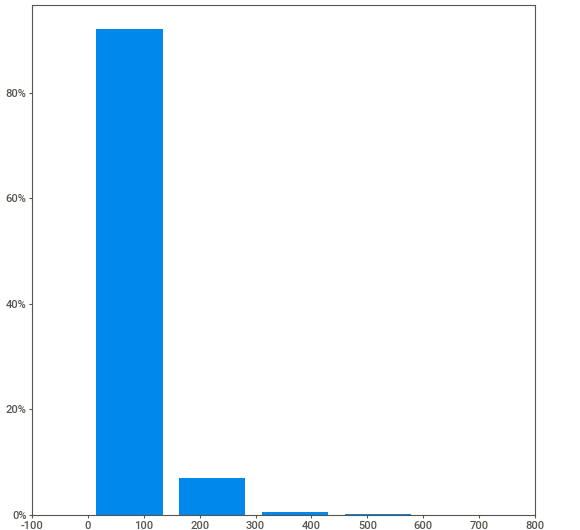
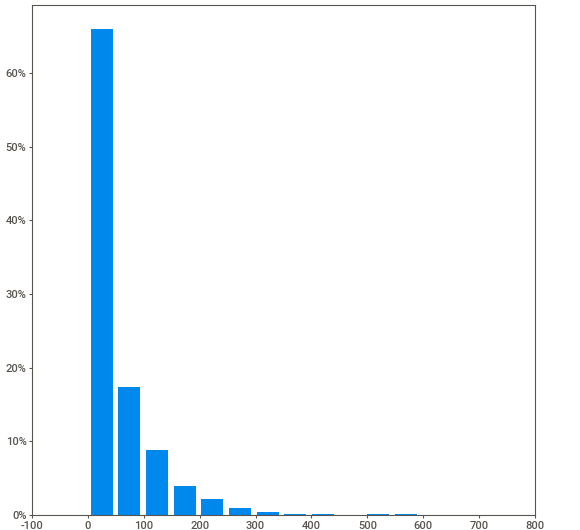
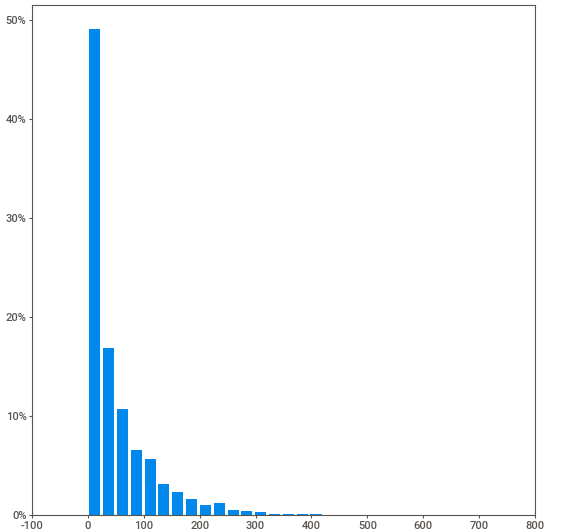
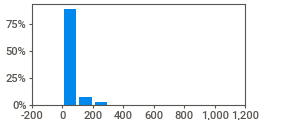
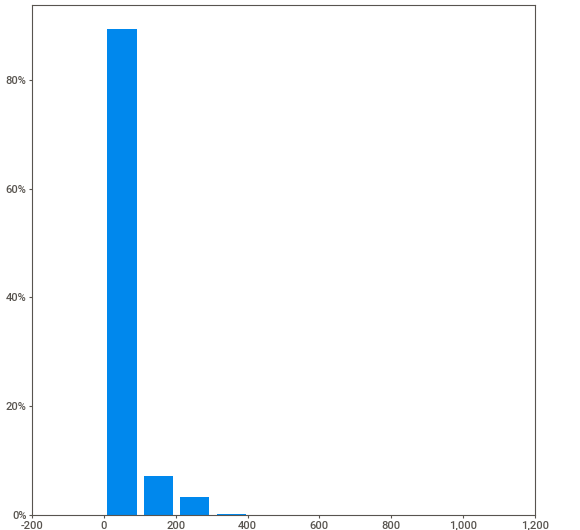
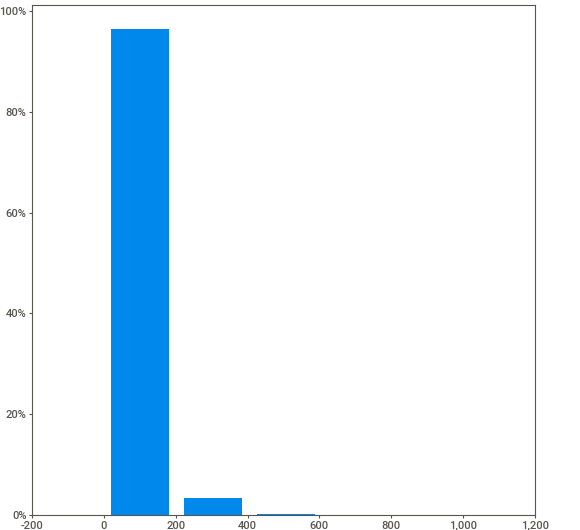
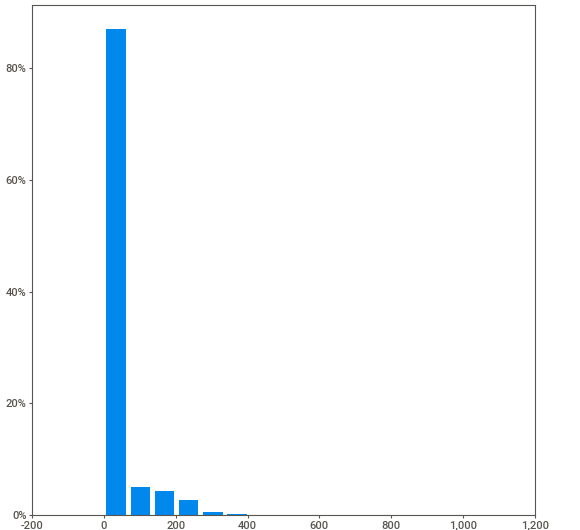
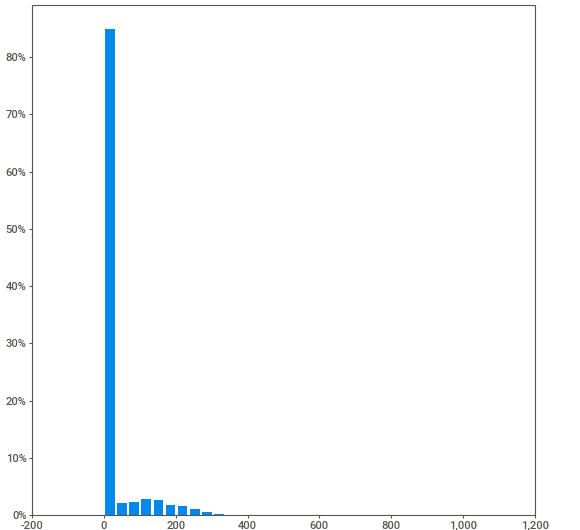
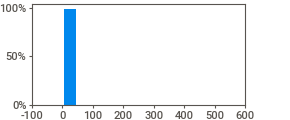
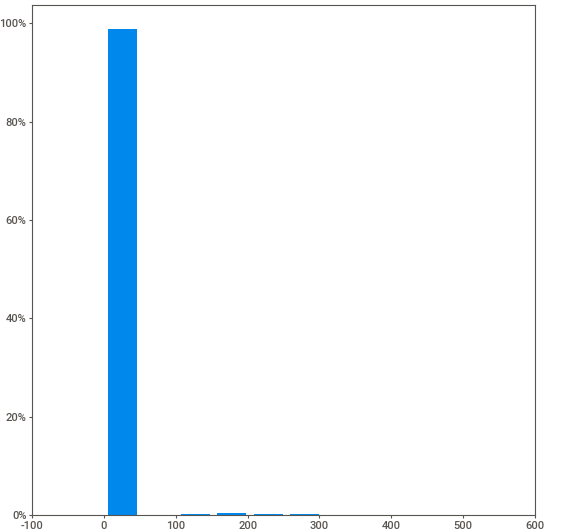
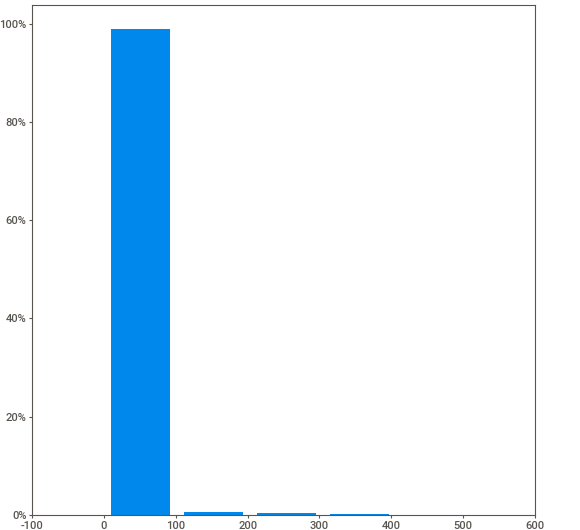
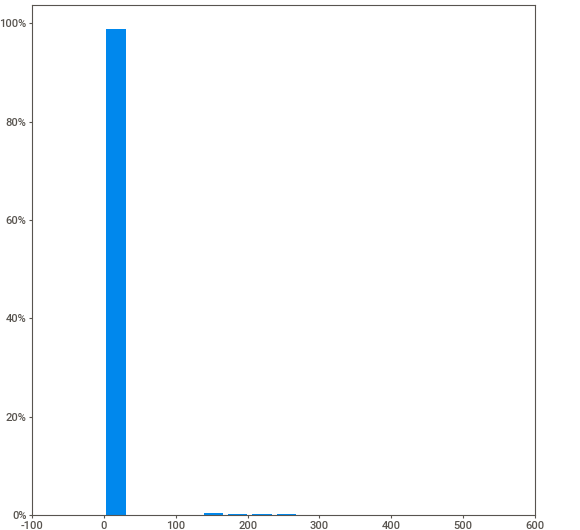
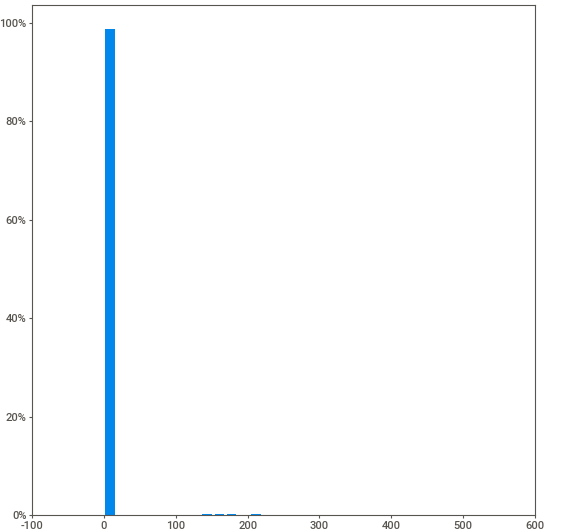
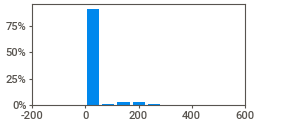
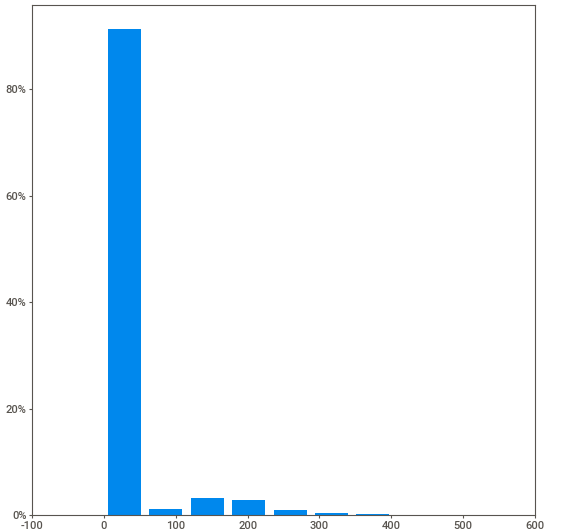
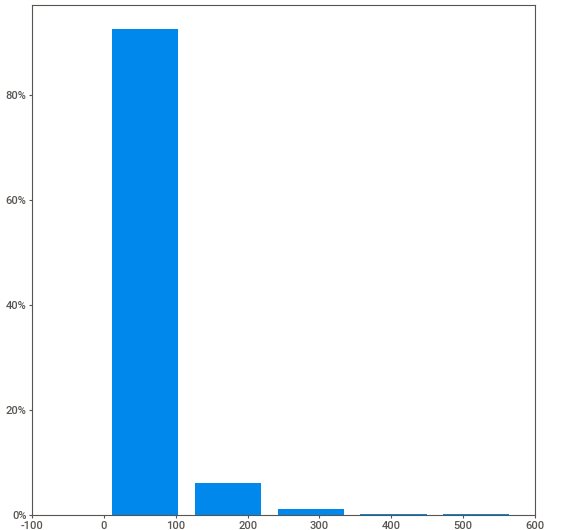
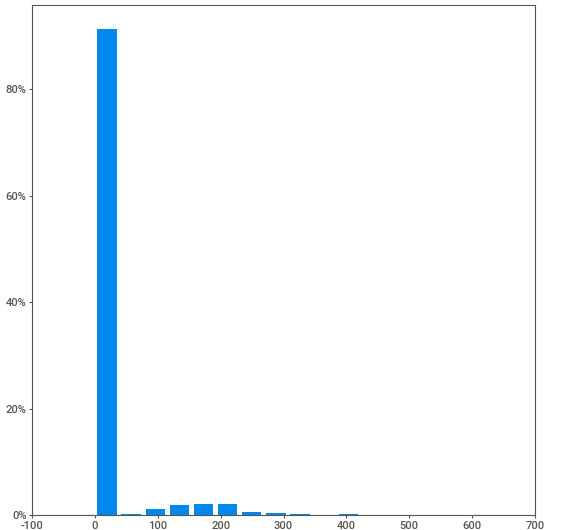
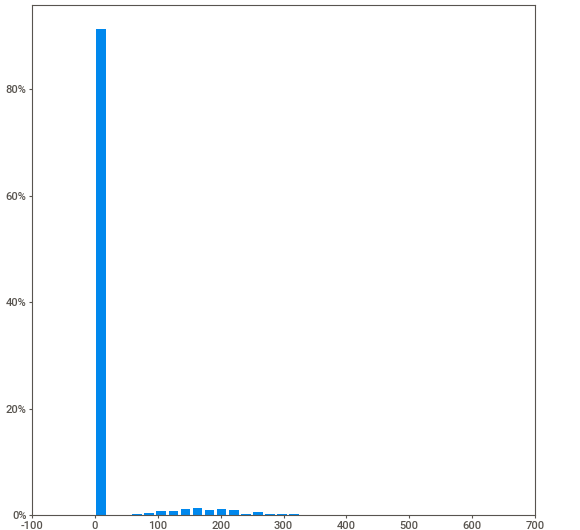
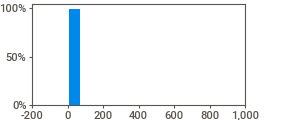
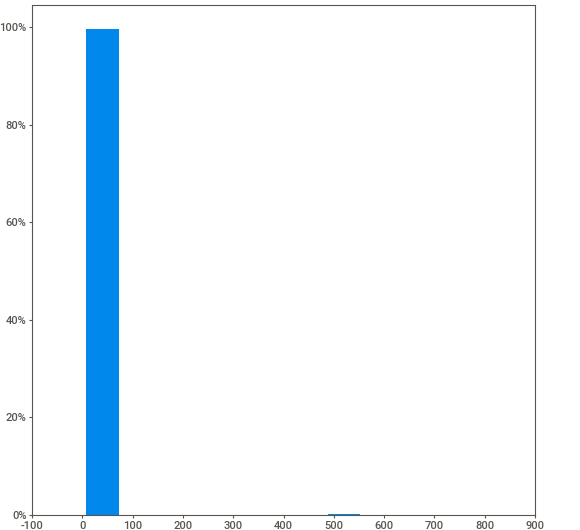
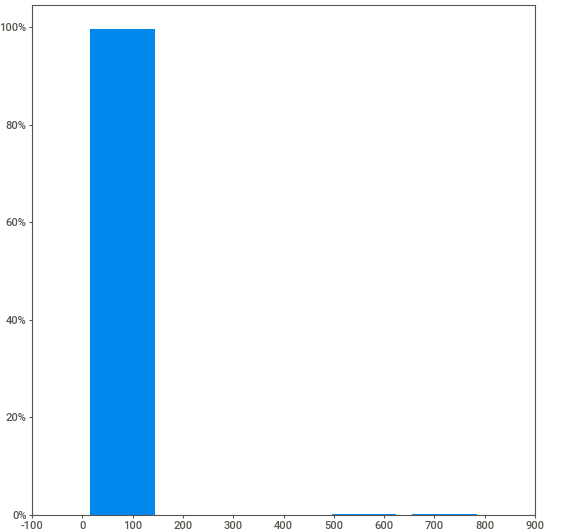
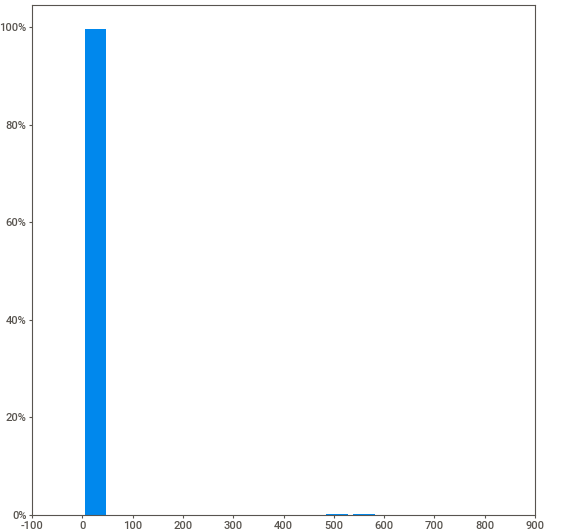
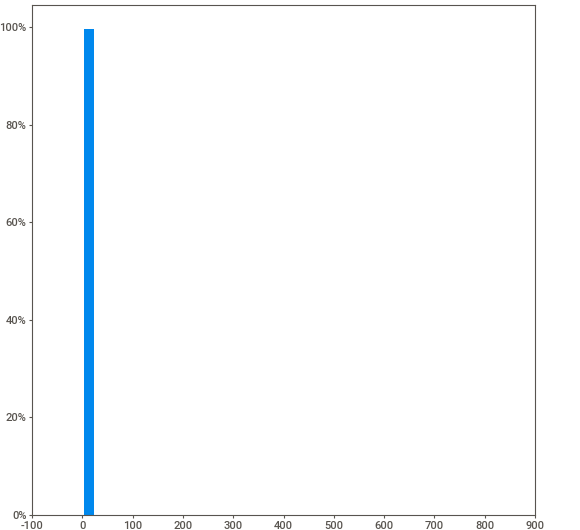
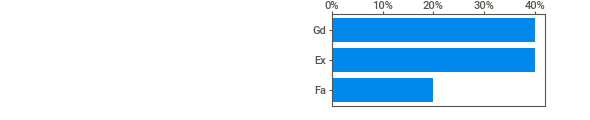
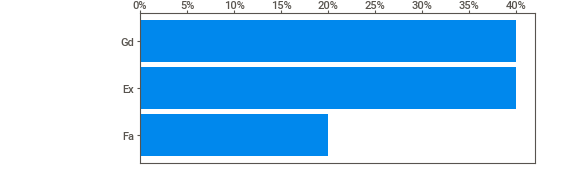
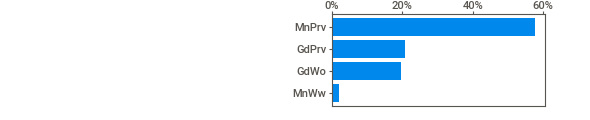
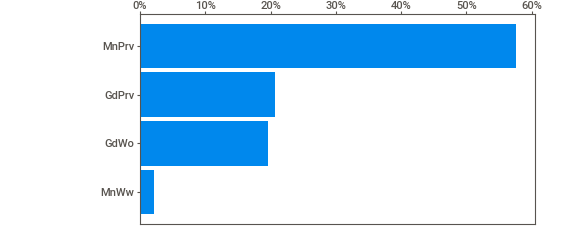
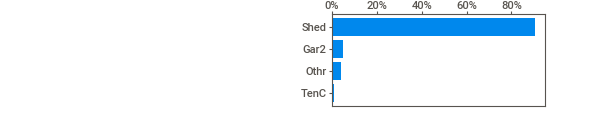
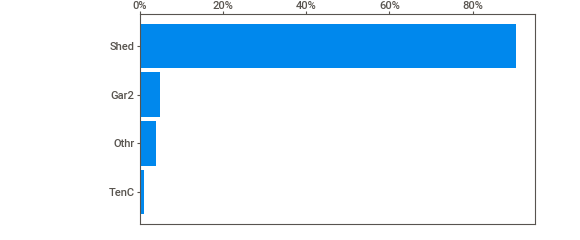
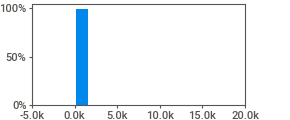
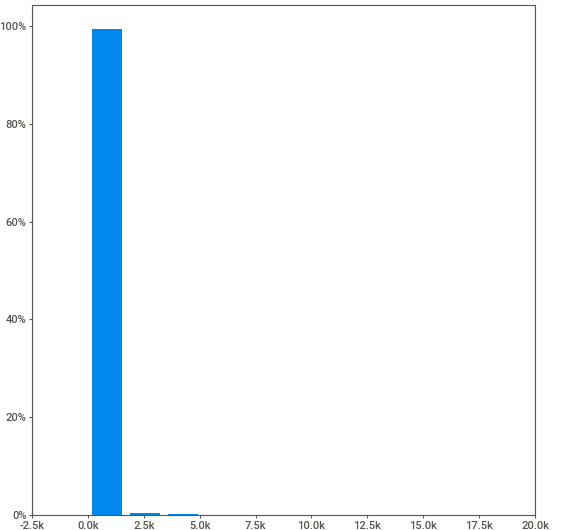
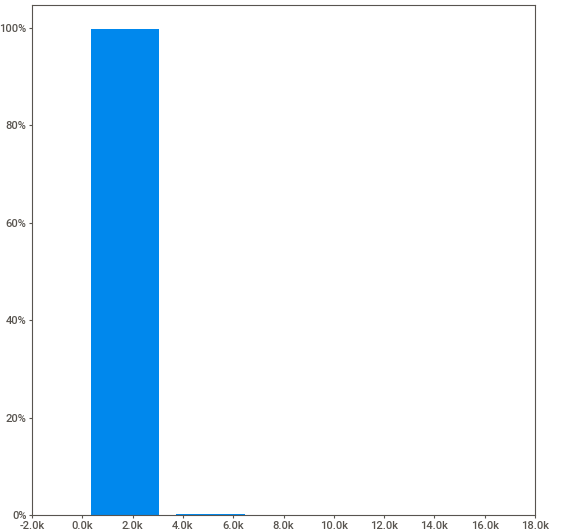
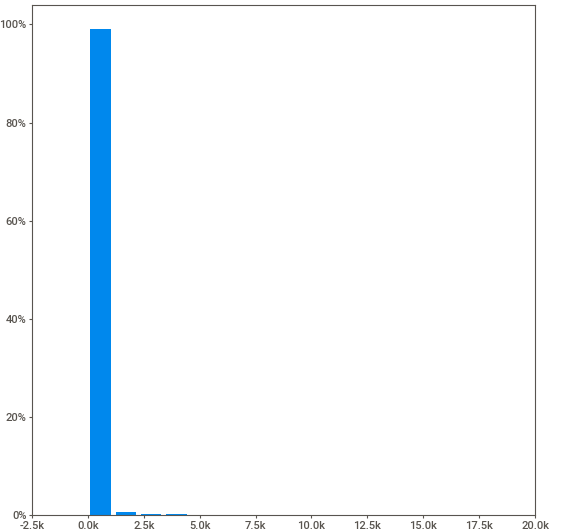
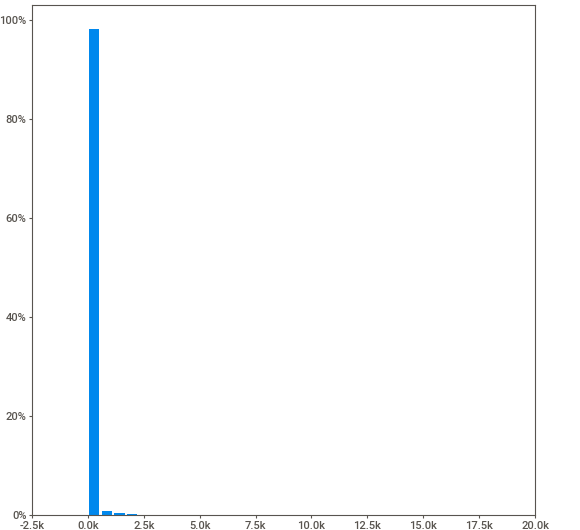
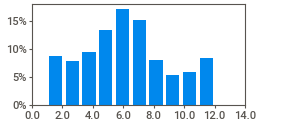
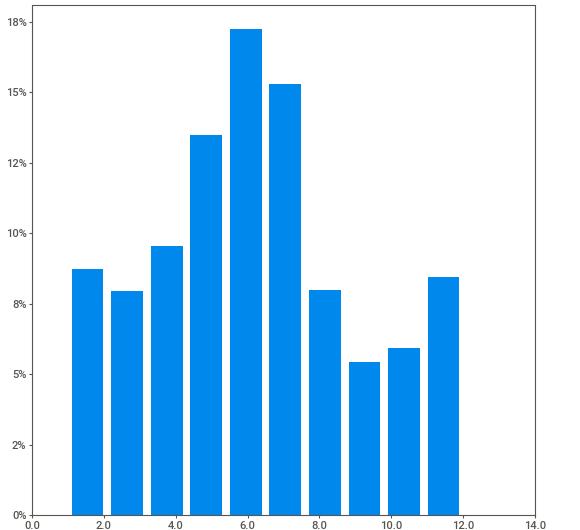
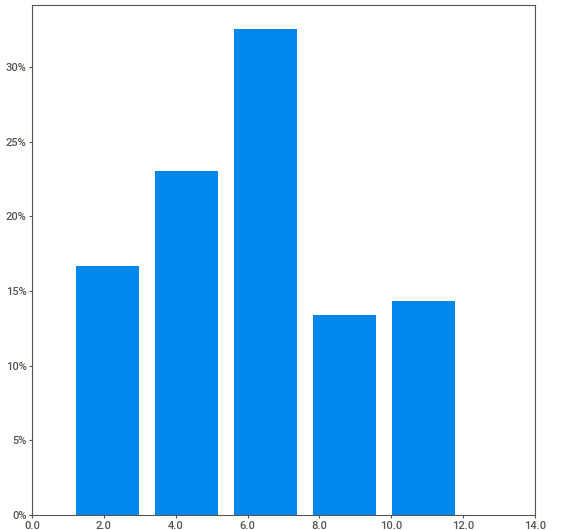
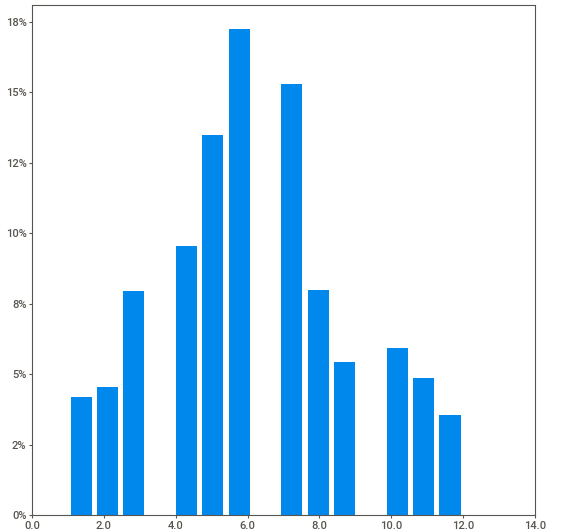
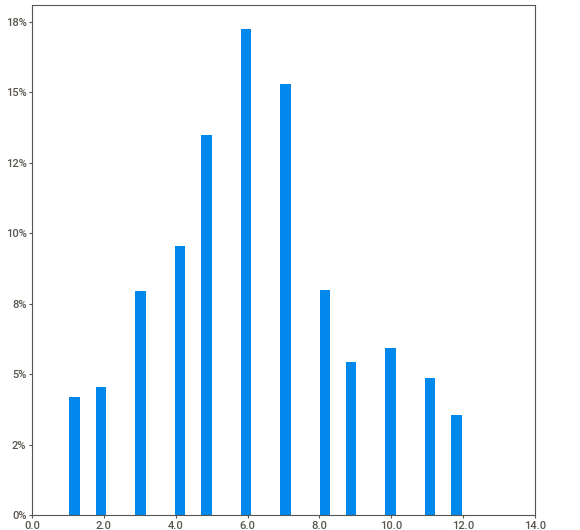
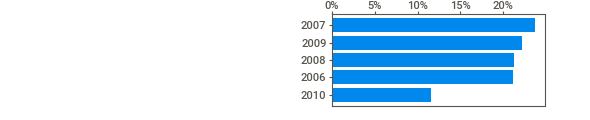
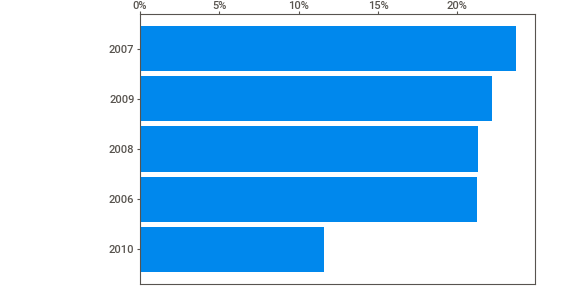
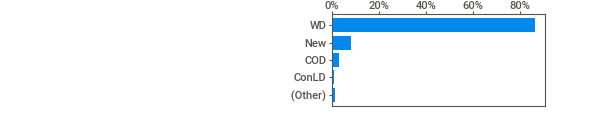
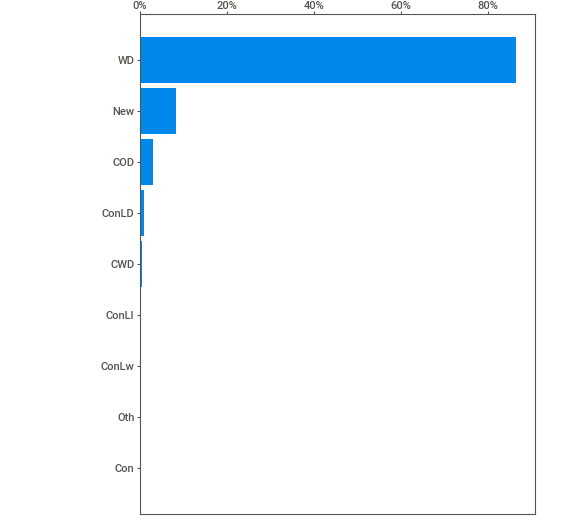
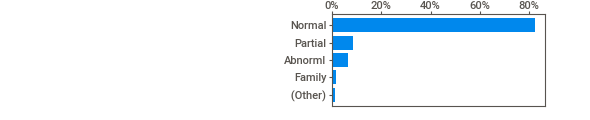
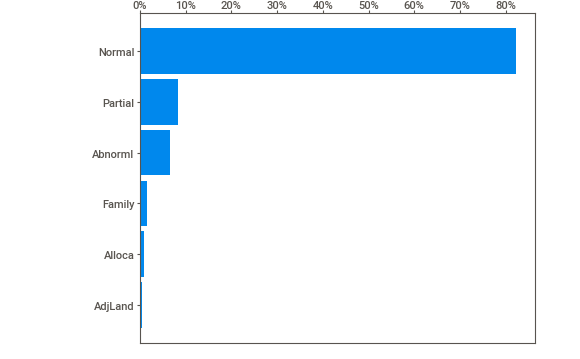
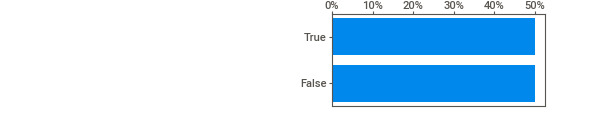
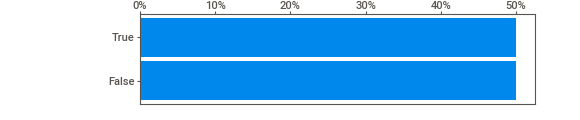
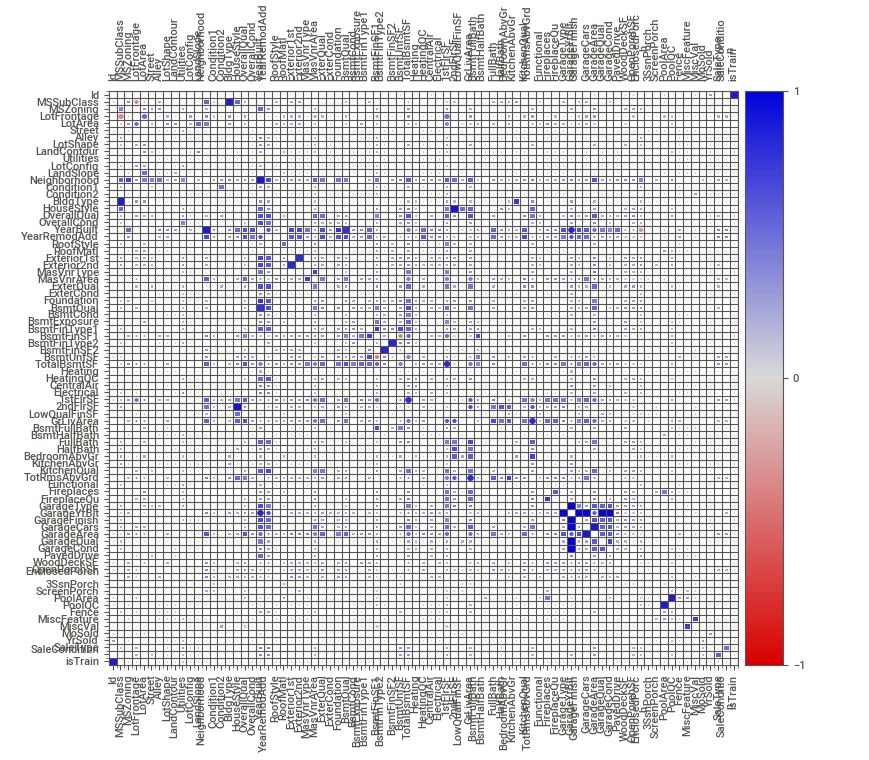
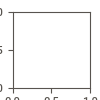

In [ ]:
all_data_report = sw.analyze(all_data)
all_data_report.show_notebook(layout='vertical')

# Special Observation

- Street - 99% of the values are equal
- Alley - 93% of the values are missing
- LandContour - 90% of the values are equal
- Utilities - 99% of the values are equal (only 1 value is different)
- LandSlope - 95% of the values are equal
- Neighborhood - Very high correlation with YearBuilt
- Condition2 - 99% of the values are equal
- BIdgType - Very high correlation with MSSubClass
- HouseStyle - Very high correlation with 2ndFlrSF
- RoofMatl - 99% of the values are equal
- BsmtCond - 92% of the values are equal
- BsmtFinSF2 - 89% zeros
- TotalBsmtSF -  High correlation with 1stFlrSF
- Heating - 98% of the values are equal (GasA)
- CentralAir - 93% of the values are equal (Y)
- Electrical - 92% of the values are equal
- LowQualFinSF - 99% zeros
- KitchenAbvGr - 95% of the values are equal
- Functional - 93% of the values are equal
- FireplaceQu - Almost half of the values are missing
- GarageFinish, GarageQual, GarageCond, GarageCars, GarageType Has 0.99/1.00  correlation with GarageYrBlt
- GarageQual - 94% of the values are equal
- GarageCond - 96% of the values are equal
- 3SsnPorch - 99% zeros
- ScreenPorch - 91% zeros
- PoolArea - 99% zeros
- PoolQC - 99% of values are missing
- Fence - 80% of values are missing
- MiscFeature - 96% of values are missing
- MiscVal - 96% zeros

#Some observation on the data description from Kaggle shows that some features have NA values with a meaning (They are not a missing values)


---



# Also, There are numerous categorical features that are also ordinal.


---


**Here i'll specify those features:**

- Alley NA is not a missing value
- BsmtQual is ordinal, NA is not a missing value
- BsmtCond is ordinal, NA is not a missing value
- BsmtExposure is ordinal, NA is not a missing value
- BsmtFinType1 is ordinal, NA is not a missing value
- BsmtFinType2 is ordinal, NA is not a missing value
- HeatingQC is ordinal
- KitchenQual is ordinal
- FireplaceQu is ordinal, NA is not a missing value
- GarageType NA is not a missing value
- GarageFinish is ordinal, NA is not a missing value
- GarageQual is ordinal, NA is not a missing value
- GarageCond is ordinal, NA is not a missing value
- PoolQC is ordinal, NA is not a missing value
- Fence NA is not a missing value
- Fence can be seperate to new features: FencePrivacy, FenceWood
- MiscFeature NA is not a missing value
- All the NA values in these features I'll change to No
# I'll encode the ordinal features to ordinal numeric

# Conclusions

**Features I'll drop:**
- Id - has nothing to do with the target value

In [ ]:
all_data.drop(['Id'], axis = 1, inplace=True)

**Change NA to No**

In [ ]:
columns_to_change = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                     'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                     'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

all_data[columns_to_change] = all_data[columns_to_change].fillna(value='None')

**Change features from categorical to numerical ordinal**

In [ ]:
grades_to_numeric_dict ={'None' : int(0), 'Po' : int(1), 'No' : int(1), 'Unf' : int(1),
                         'Fa' : int(2), 'Mn' : int(2), 'LwQ' : int(2), 'TA' : int(3),
                         'Av' : int(3), 'Rec' : int(3), 'Gd' : int(4), 'BLQ' : int(4),
                         'Ex' : int(5), 'ALQ' : int(5), 'GLQ' : int(6)}
                         
columns_to_change = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                     'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
                     'GarageQual', 'GarageCond', 'PoolQC']

all_data[columns_to_change] = all_data[columns_to_change].replace(to_replace=grades_to_numeric_dict)

In [ ]:
all_data

MSSubClass MSZoning  LotFrontage  ...  SaleType SaleCondition isTrain
0             60       RL         65.0  ...        WD        Normal    True
1             20       RL         80.0  ...        WD        Normal    True
2             60       RL         68.0  ...        WD        Normal    True
3             70       RL         60.0  ...        WD       Abnorml    True
4             60       RL         84.0  ...        WD        Normal    True
...          ...      ...          ...  ...       ...           ...     ...
2914         160       RM         21.0  ...        WD        Normal   False
2915         160       RM         21.0  ...        WD       Abnorml   False
2916          20       RL        160.0  ...        WD       Abnorml   False
2917          85       RL         62.0  ...        WD        Normal   False
2918          60       RL         74.0  ...        WD        Normal   False

[2919 rows x 80 columns]

# Filling missing values

In [ ]:
def count_empty_valus(df):
  df_missing = df.columns[df.isna().any()]

  for col in df_missing:
    print(f"{col} has {df[col].isna().sum()} missing values")

count_empty_valus(all_data)

MSZoning has 4 missing values
LotFrontage has 486 missing values
Utilities has 2 missing values
Exterior1st has 1 missing values
Exterior2nd has 1 missing values
MasVnrType has 24 missing values
MasVnrArea has 23 missing values
BsmtFinSF1 has 1 missing values
BsmtFinSF2 has 1 missing values
BsmtUnfSF has 1 missing values
TotalBsmtSF has 1 missing values
Electrical has 1 missing values
BsmtFullBath has 2 missing values
BsmtHalfBath has 2 missing values
KitchenQual has 1 missing values
Functional has 2 missing values
GarageYrBlt has 159 missing values
GarageCars has 1 missing values
GarageArea has 1 missing values
SaleType has 1 missing values


In [ ]:
def fill_na_median(df, column_name): # for int values
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):# for float values
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):# for categorical values
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)


def fill_na_data(df):
  for col in df:
    if df[col].dtype == 'int64' or col in ["BsmtFullBath", "BsmtFullBath", "GarageCars"]:
      fill_na_median(df, col)
    elif df[col].dtype == 'float64' and col not in ["BsmtFullBath", "BsmtFullBath", "GarageCars"]:
      fill_na_mean(df, col)
    else:
      fill_na_random_pick_column_distribution(df, col)

fill_na_data(all_data)


In [ ]:
np.where(all_data.isnull())

(array([], dtype=int64), array([], dtype=int64))

# Great :)

In [ ]:
#These features need to be int
all_data["BsmtFullBath"] = all_data.BsmtFullBath.astype('int')
all_data["BsmtHalfBath"] = all_data.BsmtHalfBath.astype('int')
all_data["GarageCars"] = all_data.GarageCars.astype('int')

# OK! now we know the data better.

**Also we dropped a few columns and filled missing values**

# Now lets encode the categorical values

In [ ]:
categorical_cols = all_data.loc[:, all_data.columns != 'isTrain'].select_dtypes(include=['object', 'bool']).columns
all_data = pd.get_dummies(all_data, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

# Normilize all data

In [ ]:
is_train_col = all_data.isTrain
all_data.drop(['isTrain'], axis=1, inplace=True)

all_data_normlized = StandardScaler().fit_transform(all_data)
all_data = pd.DataFrame(all_data_normlized, columns=all_data.columns)
all_data['isTrain'] = is_train_col

all_data

MSSubClass  LotFrontage  ...  SaleCondition_Partial  isTrain
0       0.067331    -0.202068  ...              -0.302693     True
1      -0.873616     0.501870  ...              -0.302693     True
2       0.067331    -0.061280  ...              -0.302693     True
3       0.302568    -0.436714  ...              -0.302693     True
4       0.067331     0.689587  ...              -0.302693     True
...          ...          ...  ...                    ...      ...
2914    2.419700    -2.266952  ...              -0.302693    False
2915    2.419700    -2.266952  ...              -0.302693    False
2916   -0.873616     4.256207  ...              -0.302693    False
2917    0.655424    -0.342855  ...              -0.302693    False
2918    0.067331     0.220295  ...              -0.302693    False

[2919 rows x 217 columns]

# Seperate train and test

In [ ]:
train = all_data[all_data['isTrain'] == 1]
test = all_data[all_data['isTrain'] == 0]

train.drop("isTrain", axis=1, inplace=True)
test.drop("isTrain", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**A method that gets: data and model and returns R2 score and RMSE loss**

In [ ]:
def RMSE(y, t):
  y_log = np.log(y)
  t_log = np.log(t)
  return mean_squared_error(t_log, y_log, squared=False)

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = RepeatedKFold(n_splits=k, n_repeats=10, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = abs(model.predict(X_train))
        y_val = abs(model.predict(X_val))
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), RMSE(y_train, t_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), RMSE(y_val, t_val)]

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss(RMSE): {mean_val_loss:.2f}, Mean Train Loss(RMSE): {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

# **To limit over-fitting I'll test the use of regularization and feature selection.**

# **Finding the best hyper parameters from:**
regularization techniques:
- l1 (Lasso)
- l2 (Ridge)
- Elastic net

alpha:
- 0.0001
- 0.001
- 0.01
- 0.1

learning rate (eta0):
- 0.0001
- 0.001
- 0.01
- 0.1

# **The function uses k fold Cross validation**

In [ ]:
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1], 'learning_rate':['constant'], 'eta0':[0.0001, 0.001, 0.01, 0.1]}
gs_model = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters, cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(train, target)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.7868276798140379
best params {'alpha': 0.1, 'eta0': 0.0001, 'learning_rate': 'constant', 'penalty': 'l2'}


# Now i'll try Backward feature selection using RFECV 
**I'll use this function with RepeatedKFold cv**

In [ ]:
selector = RFECV(SGDRegressor(random_state=1, alpha=gs_model.best_params_['alpha'], learning_rate='constant', eta0=gs_model.best_params_['eta0'], penalty=gs_model.best_params_['penalty']), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(train, target)
selector_df = train.loc[:, selector.support_]
selector_df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


MSSubClass  OverallQual  ...  RoofMatl_WdShngl  SaleType_New
0       0.067331     0.646183  ...         -0.049029     -0.298629
1      -0.873616    -0.063185  ...         -0.049029     -0.298629
2       0.067331     0.646183  ...         -0.049029     -0.298629
3       0.302568     0.646183  ...         -0.049029     -0.298629
4       0.067331     1.355551  ...         -0.049029     -0.298629
...          ...          ...  ...               ...           ...
1455    0.067331    -0.063185  ...         -0.049029     -0.298629
1456   -0.873616    -0.063185  ...         -0.049029     -0.298629
1457    0.302568     0.646183  ...         -0.049029     -0.298629
1458   -0.873616    -0.772552  ...         -0.049029     -0.298629
1459   -0.873616    -0.772552  ...         -0.049029     -0.298629

[1460 rows x 23 columns]

In [ ]:
SGD_reg_selector = pipeline.make_pipeline(SGDRegressor(alpha=gs_model.best_params_['alpha'], learning_rate='constant', eta0=gs_model.best_params_['eta0'], penalty=gs_model.best_params_['penalty'], random_state=1)).fit(selector_df, target)
get_cv_score_and_loss(selector_df, target, SGD_reg_selector, k=5)

(0.8280009796755123,
 0.1658454580817544,
 0.8603774936641241,
 0.15885628154939277)

In [ ]:
SGD_reg = pipeline.make_pipeline(SGDRegressor(alpha=gs_model.best_params_['alpha'], learning_rate='constant', eta0=gs_model.best_params_['eta0'], penalty=gs_model.best_params_['penalty'], random_state=1)).fit(train, target)
get_cv_score_and_loss(train, target, SGD_reg, k=5)

(0.7868276798140379,
 0.2267389775936798,
 0.9035162345962415,
 0.1285446433089487)

# It looks like the model with the feature selection gives the best results on the cv.. I'll test it on the test data

In [ ]:
test = test[test.columns.intersection(selector_df.columns)]
y_test = SGD_reg_selector.predict(test)

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['SalePrice'] = y_test
submission.to_csv('submission.csv', index=False)
submission.head()

Id      SalePrice
0  1461  111342.572500
1  1462  160366.002345
2  1463  165832.718330
3  1464  185583.891379
4  1465  223075.676439

# **IMPORTANT!**

**In this model I used feature selection because it looked the best option on the cv but on the test the model without the feature selection was better**

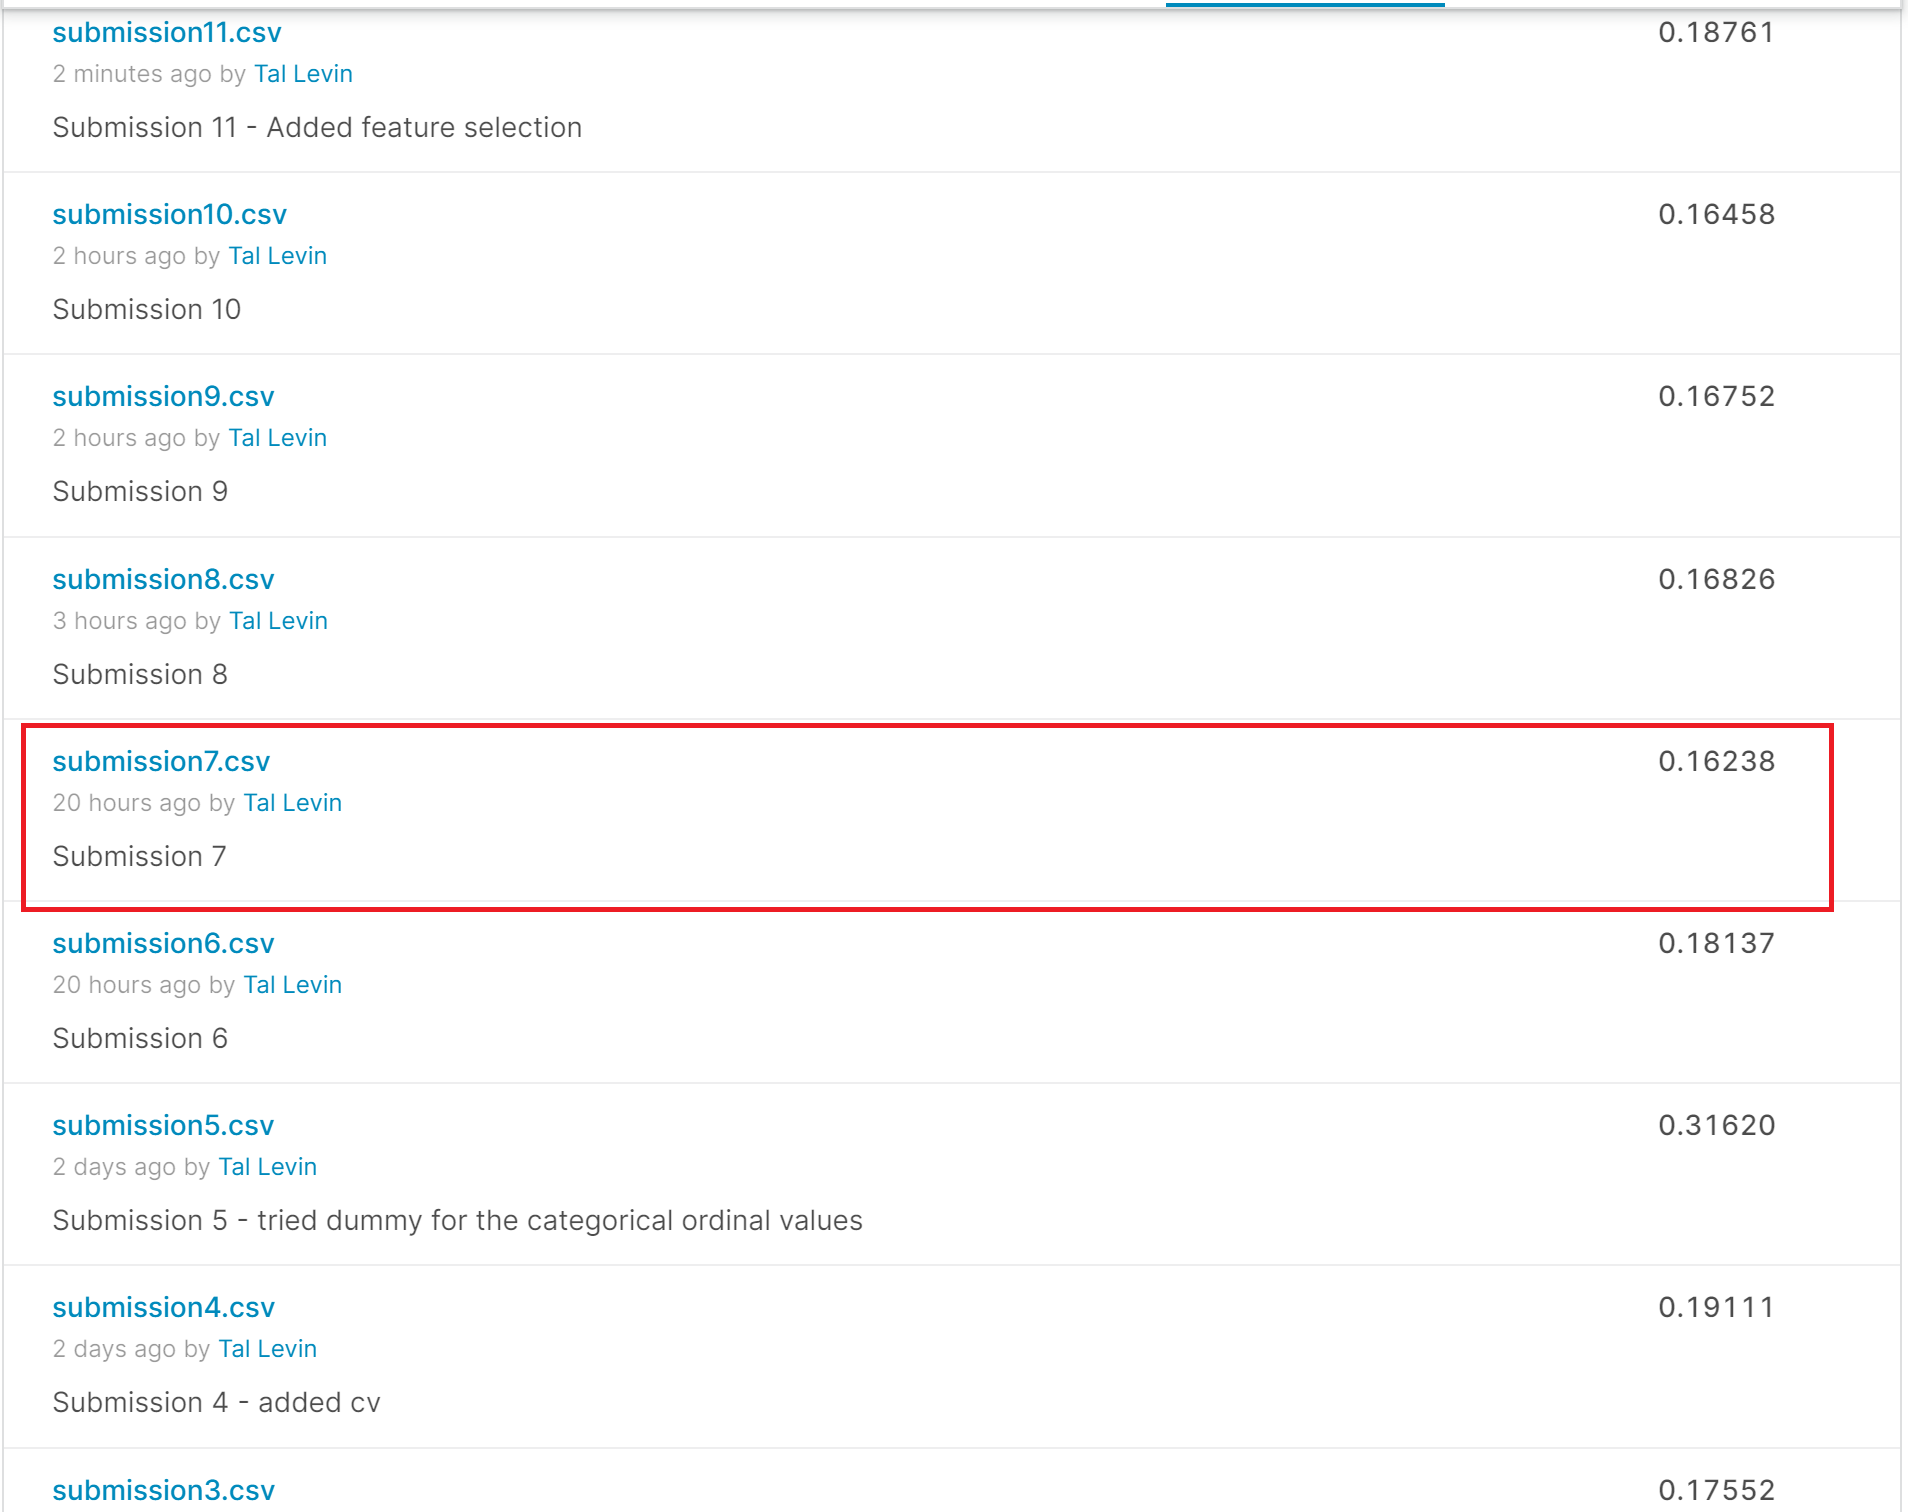

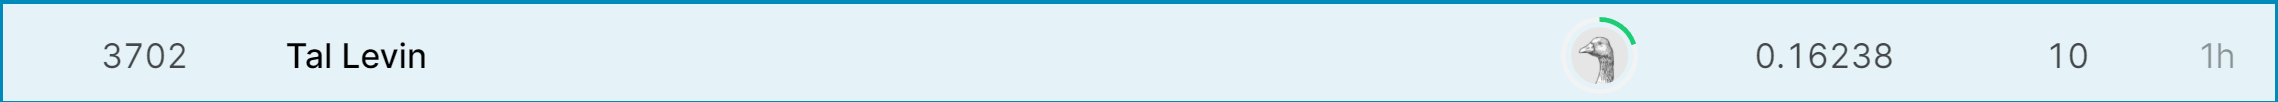

In [ ]:
%%shell
jupyter nbconvert --to html /content/Tal_Levin_314920505_House_Prices_NB.ipynb

[NbConvertApp] Converting notebook /content/Tal_Levin_314920505_House_Prices_NB.ipynb to html
[NbConvertApp] Writing 6295790 bytes to /content/Tal_Levin_314920505_House_Prices_NB.html
